In [1]:
%pip install prince


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
#libraries
import pandas as pd 
import numpy as np
import pip
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy.stats as stats
import random
import itertools
import prince

from scipy.stats import shapiro, spearmanr, mannwhitneyu, kruskal
from decimal import Decimal
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data collectin and initial check

Load the csv file into a pandas dataframe and check the variable types.

In [3]:
path = "./dataset_project_eHealth20252026.csv"
dataset = pd.read_csv(path)
dataset.head(5)

,age,gender,education,marital,income,audit_1,audit_2,audit_3,audit_4,audit_5,...,swls_1,swls_2,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5
0,39.0,0,8.0,1.0,14000,4,3,0.0,0,4.0,...,2,0.0,4.0,2.0,0,2.0,3,3.0,3.0,2.0
1,18.0,1,5.0,1.0,25000,4,4,0.0,0,0.0,...,0,4.0,2.0,4.0,4,0.0,0,3.0,2.0,2.0
2,40.0,0,13.0,2.0,56000,0,0,0.0,0,0.0,...,0,2.0,4.0,0.0,2,3.0,2,3.0,2.0,3.0
3,24.0,1,22.0,0.0,35000,1,0,1.0,1,1.0,...,2,2.0,4.0,3.0,4,3.0,2,1.0,2.0,3.0
4,19.0,1,22.0,1.0,42000,2,2,0.0,2,2.0,...,5,7.0,3.0,5.0,7,5.0,5,4.0,3.0,3.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 96 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        220 non-null    float64
 1   gender     221 non-null    int64  
 2   education  220 non-null    float64
 3   marital    220 non-null    float64
 4   income     221 non-null    int64  
 5   audit_1    221 non-null    int64  
 6   audit_2    221 non-null    int64  
 7   audit_3    220 non-null    float64
 8   audit_4    221 non-null    int64  
 9   audit_5    220 non-null    float64
 10  audit_6    221 non-null    int64  
 11  audit_7    220 non-null    float64
 12  audit_8    220 non-null    float64
 13  audit_9    220 non-null    float64
 14  audit_10   219 non-null    float64
 15  dast_1     221 non-null    int64  
 16  dast_2     219 non-null    float64
 17  dast_3     220 non-null    float64
 18  dast_4     221 non-null    int64  
 19  dast_5     220 non-null    float64
 20  dast_6    

In [5]:
df = pd.DataFrame(dataset) #dataframe creation

In [6]:
print("Elenco colonne del dataset:")
for i, col in enumerate(df.columns):
    print(f"{i+1:02d}: {col}")

Elenco colonne del dataset:
01: age
02: gender
03: education
04: marital
05: income
06: audit_1
07: audit_2
08: audit_3
09: audit_4
10: audit_5
11: audit_6
12: audit_7
13: audit_8
14: audit_9
15: audit_10
16: dast_1
17: dast_2
18: dast_3
19: dast_4
20: dast_5
21: dast_6
22: dast_7
23: dast_8
24: dast_9
25: dast_10
26: pgsi_1
27: pgsi_2
28: pgsi_3
29: pgsi_4
30: pgsi_5
31: pgsi_6
32: pgsi_7
33: pgsi_8
34: pgsi_9
35: iat_1
36: iat_2
37: iat_3
38: iat_4
39: iat_5
40: iat_6
41: iat_7
42: iat_8
43: iat_9
44: iat_10
45: iat_11
46: iat_12
47: iat_13
48: iat_14
49: iat_15
50: iat_16
51: iat_17
52: iat_18
53: iat_19
54: iat_20
55: pcl5_1
56: pcl5_2
57: pcl5_3
58: pcl5_4
59: pcl5_5
60: pcl5_6
61: pcl5_7
62: pcl5_8
63: pcl5_9
64: pcl5_10
65: pcl5_11
66: pcl5_12
67: pcl5_13
68: pcl5_14
69: pcl5_15
70: pcl5_16
71: pcl5_17
72: pcl5_18
73: pcl5_19
74: pcl5_20
75: mspss_1
76: mspss_2
77: mspss_3
78: mspss_4
79: mspss_5
80: mspss_6
81: mspss_7
82: mspss_8
83: mspss_9
84: mspss_10
85: mspss_11
86: mspss

The dataset has 221 rows and 96 columns.

# Data cleaning

Check for duplicated rows and delete them.

In [7]:
df.duplicated() #check for duplicated rows and delete them

0      False
1      False
2      False
3      False
4      False
       ...  
216     True
217     True
218     True
219     True
220     True
Length: 221, dtype: bool

In [8]:
df = df.drop_duplicates()

In [9]:
df

,age,gender,education,marital,income,audit_1,audit_2,audit_3,audit_4,audit_5,...,swls_1,swls_2,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5
0,39.0,0,8.0,1.0,14000,4,3,0.0,0,4.0,...,2,0.0,4.0,2.0,0,2.0,3,3.0,3.0,2.0
1,18.0,1,5.0,1.0,25000,4,4,0.0,0,0.0,...,0,4.0,2.0,4.0,4,0.0,0,3.0,2.0,2.0
2,40.0,0,13.0,2.0,56000,0,0,0.0,0,0.0,...,0,2.0,4.0,0.0,2,3.0,2,3.0,2.0,3.0
3,24.0,1,22.0,0.0,35000,1,0,1.0,1,1.0,...,2,2.0,4.0,3.0,4,3.0,2,1.0,2.0,3.0
4,19.0,1,22.0,1.0,42000,2,2,0.0,2,2.0,...,5,7.0,3.0,5.0,7,5.0,5,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,1,1,0.0,0,0.0,...,4,1.0,4.0,0.0,0,0.0,3,3.0,3.0,1.0
196,21.0,0,18.0,1.0,38000,1,1,1.0,0,1.0,...,4,4.0,4.0,4.0,3,3.0,3,2.0,0.0,3.0
197,20.0,1,22.0,4.0,50000,2,2,0.0,2,1.0,...,7,7.0,7.0,1.0,7,3.0,5,5.0,5.0,3.0
198,39.0,0,8.0,1.0,22000,0,4,3.0,2,0.0,...,0,4.0,4.0,4.0,1,1.0,0,3.0,2.0,0.0


The deleted rows are 21, the dataset has 200 rows and 96 columns and it is saved in a new dataset named new_df.

In [10]:
new_df = df.copy()

## Handling missing values

The dataset contains some missing values. These are not necessarily due to data collection errors — in some cases, they result from the questionnaire structure (skip logic), where certain responses are implicitly determined by previous answers. Therefore, the missing data are assumed to follow a "Missing At Random" (MAR) mechanism rather than being "Missing Completely At Random" (MCAR). 
However, for analytical purposes, we treat them as completely random, assuming no systematic bias is introduced.
Imputation Strategy:
- Categorical variables  -> mode
- Binary variables (0/1) -> mode
- Continuous / Likert-scale variables -> mean if |skew| <= 0.5, else median
- Label columns are excluded from imputation

This approach helps preserve data consistency while minimizing distortion in the overall distribution. Before imputation, null-like string values are normalized to ensure correct detection and replacement.

Replace all different representations of missing or empty values in the DataFrame (e.g., empty strings, "NA", "N/A", "nan", "missing", None, etc.) with a consistent NaN value recognized by pandas for easier data cleaning and analysis.

In [11]:
new_df = new_df.replace(
    ["", " ", "NA", "N/A", "na", "NaN", "nan", "missing", "None", None, pd.NaT, pd.NA],
    np.nan
)

In [12]:
# helper function to safely get the mode of a series, returning NaN if no mode found
def safe_mode(s):
    m = s.mode(dropna=True)
    return m.iloc[0] if len(m) else np.nan

# 1) define known groups of columns
label_cols = [c for c in new_df.columns if c.endswith("_label") or c.endswith("_labels")]
cat_code_cols = [c for c in ["gender", "education", "marital"] if c in new_df.columns]
binary_cols = [c for c in new_df.columns if c.startswith("dast_")]  # DAST columns are binary 0/1
# automatically add any other columns that are 0/1 and not already classified
for c in new_df.columns:
    if c in binary_cols or c in label_cols:
        continue
    vals = pd.to_numeric(new_df[c], errors="coerce")
    uniq = set(vals.dropna().unique())
    if uniq.issubset({0, 1}) and c not in binary_cols:
        binary_cols.append(c)

# 2) convert columns to numeric where needed (skip labels and categorical coded columns)
numeric_candidates = [c for c in new_df.columns if c not in label_cols]
for c in numeric_candidates:
    new_df[c] = pd.to_numeric(new_df[c], errors="coerce")

# 3) count missing values before imputation
nan_before = new_df.isna().sum().to_dict()
decisions = []

# 4) imputations
# 4a) for categorical coded columns -> fill missing values with mode
for c in cat_code_cols:
    if c in new_df.columns:
        val = safe_mode(new_df[c])
        new_df[c] = new_df[c].fillna(val)
        decisions.append((c, "mode (categorical)"))

# 4b) for binary columns (DAST + other auto-detected 0/1) -> fill missing with mode
for c in binary_cols:
    if c in new_df.columns and c not in cat_code_cols:
        val = safe_mode(new_df[c])
        new_df[c] = new_df[c].fillna(val)
        decisions.append((c, "mode (binary)"))

# 4c) for all other numeric columns -> fill missing with mean or median based on skewness
for c in new_df.columns:
    if c in label_cols or c in cat_code_cols or c in binary_cols:
        continue
    # consider only real numeric columns
    if not pd.api.types.is_numeric_dtype(new_df[c]):
        continue
    s = new_df[c].dropna()
    if s.empty:
        continue
    skew = s.skew()  # Pandas skewness (Fisher-Pearson)
    if np.isfinite(skew) and abs(skew) <= 0.5:
        fill_val = s.mean()
        method = "mean (|skew|<=0.5)"
    else:
        fill_val = s.median()
        method = "median (|skew|>0.5)"
    new_df[c] = new_df[c].fillna(fill_val)
    decisions.append((c, f"{method}; skew={skew:.2f}"))

# 5) count missing values after imputation and calculate how many were replaced
nan_after = new_df.isna().sum().to_dict()
fixed_per_col = {c: int(nan_before.get(c,0) - nan_after.get(c,0)) for c in new_df.columns}

print("=== Imputation decisions (first 30) ===")
for name, how in decisions[:30]:
    print(f"{name:>20} -> {how}")

print("\n=== NaN replaced per column (top 20) ===")
for col, nfix in sorted(fixed_per_col.items(), key=lambda x: x[1], reverse=True)[:20]:
    if nfix > 0:
        print(f"{col:>20}: {nfix}")

print("\nTotale NaN sostituiti:", sum(fixed_per_col.values()))


=== Imputation decisions (first 30) ===
              gender -> mode (categorical)
           education -> mode (categorical)
             marital -> mode (categorical)
              dast_1 -> mode (binary)
              dast_2 -> mode (binary)
              dast_3 -> mode (binary)
              dast_4 -> mode (binary)
              dast_5 -> mode (binary)
              dast_6 -> mode (binary)
              dast_7 -> mode (binary)
              dast_8 -> mode (binary)
              dast_9 -> mode (binary)
             dast_10 -> mode (binary)
                 age -> mean (|skew|<=0.5); skew=0.11
              income -> median (|skew|>0.5); skew=1.05
             audit_1 -> median (|skew|>0.5); skew=1.19
             audit_2 -> median (|skew|>0.5); skew=1.04
             audit_3 -> median (|skew|>0.5); skew=1.11
             audit_4 -> median (|skew|>0.5); skew=1.17
             audit_5 -> median (|skew|>0.5); skew=1.05
             audit_6 -> median (|skew|>0.5); skew=1.12
            

In [13]:
new_df.isna().sum()

age          0
gender       0
education    0
marital      0
income       0
            ..
who5_1       0
who5_2       0
who5_3       0
who5_4       0
who5_5       0
Length: 96, dtype: int64

The imputation results show that categorical coded columns such as "gender," "education," and "marital" were filled with their mode values, which is a common and effective approach for categorical missing data. Binary columns (mostly dast_1 to dast_10) were also imputed using the mode, reflecting their binary nature and ensuring logical consistency.

For numeric columns, the code selected the imputation method based on skewness:

Columns with low skewness (|skew| ≤ 0.5), such as "age," are imputed using the mean.

Columns with higher skewness (|skew| > 0.5), such as "income," "audit_1" to "audit_10," and "pgsi_1" to "pgsi_5," are imputed using the median. Median imputation is more robust to outliers and skewed distributions, providing more reliable substitution for missing values in such cases.

The number of missing values replaced per column varies, with some columns having only a few NaNs filled, totaling 73 replacements overall.

In [14]:
new_df

,age,gender,education,marital,income,audit_1,audit_2,audit_3,audit_4,audit_5,...,swls_1,swls_2,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5
0,39.0,0,8.0,1.0,14000,4,3,0.0,0,4.0,...,2,0.0,4.0,2.0,0,2.0,3,3.0,3.0,2.0
1,18.0,1,5.0,1.0,25000,4,4,0.0,0,0.0,...,0,4.0,2.0,4.0,4,0.0,0,3.0,2.0,2.0
2,40.0,0,13.0,2.0,56000,0,0,0.0,0,0.0,...,0,2.0,4.0,0.0,2,3.0,2,3.0,2.0,3.0
3,24.0,1,22.0,0.0,35000,1,0,1.0,1,1.0,...,2,2.0,4.0,3.0,4,3.0,2,1.0,2.0,3.0
4,19.0,1,22.0,1.0,42000,2,2,0.0,2,2.0,...,5,7.0,3.0,5.0,7,5.0,5,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,1,1,0.0,0,0.0,...,4,1.0,4.0,0.0,0,0.0,3,3.0,3.0,1.0
196,21.0,0,18.0,1.0,38000,1,1,1.0,0,1.0,...,4,4.0,4.0,4.0,3,3.0,3,2.0,0.0,3.0
197,20.0,1,22.0,4.0,50000,2,2,0.0,2,1.0,...,7,7.0,7.0,1.0,7,3.0,5,5.0,5.0,3.0
198,39.0,0,8.0,1.0,22000,0,4,3.0,2,0.0,...,0,4.0,4.0,4.0,1,1.0,0,3.0,2.0,0.0


# EDA (Exploratory Data Analysis)

Exploratory Data Analysis (EDA) is a crucial first step in any data analysis or statistical study. EDA involves summarizing and visualizing key characteristics of variables to understand their distributions, detect patterns. In EDA, it is essential to distinguish between continuous and categorical variables, as each type requires different analytical strategies and visualizations. 
- Continuous variables (such as age and income) are summarized and explored using histograms and normality tests (e.g., Shapiro-Wilk) to assess distribution characteristics. 
- In contrast, categorical variables (such as gender, education, and marital status) are described with frequency counts and visualized using count plots or bar charts. Normality tests are not applicable to categorical variables, as these codes do not represent continuous measurements and must not be interpreted as such.

**Shapiro-Wilk test**

Shapiro-Wilk test is a hypothesis test that evaluates whether a data set is normally distributed. It evaluates data from a sample with the null hypothesis that the data set is normally distributed. A large p-value indicates the data set is normally distributed, a low p-value indicates that it isn’t normally distributed.

It’s a widely-used statistical tool that can help us find an answer to the normality check we need, but it has one flaw: It doesn’t work well with large data sets. The maximum allowed size for a data set depends on the implementation. For example, for samples larger than 5,000, the Shapiro-Wilk test with SciPy in Python still runs, but it issues a warning that the p-value may not be accurate due to limitations in the test’s underlying assumptions.

https://builtin.com/data-science/shapiro-wilk-test

# Univariate EDA

## Categorical variables

### Gender
Gender is a categorical variable represented by numeric codes (0, 1, 2, 3) that correspond to ordered categories.

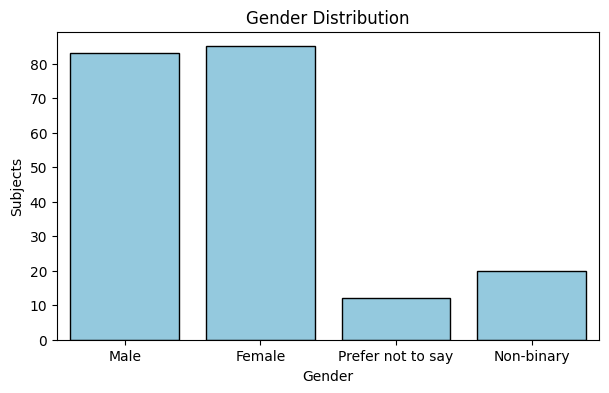

Gender counts:
gender_label
Female               85
Male                 83
Non-binary           20
Prefer not to say    12
Name: count, dtype: int64


In [15]:
#[0] Male [1] Female [2] Non-binary [3] Prefer not to say

# Replace numeric codes with labels
gender_labels = {
    0: 'Male',
    1: 'Female',
    2: 'Non-binary',
    3: 'Prefer not to say'
}
new_df['gender_label'] = new_df['gender'].map(gender_labels)

# Plot
plt.figure(figsize=(7, 4))
sns.countplot(data=new_df, x='gender_label', color='skyblue',edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Subjects')
plt.title('Gender Distribution')
#plt.xticks(rotation=15)
plt.show()

# Print frequency counts for each gender
print("Gender counts:")
print(new_df['gender_label'].value_counts(dropna=False))

The most represented categories are Female (85) and Male (83): this suggests that outcomes related to gender can be compared between these two groups with reasonable statistical power

### Education
Education is a categorical variable represented by numeric codes (5, 8, 13, 18, 22, 25) that correspond to ordered categories.

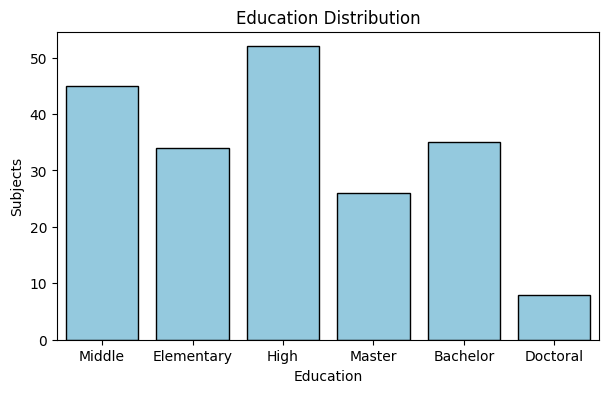

Education counts:
school_labels
High          52
Middle        45
Bachelor      35
Elementary    34
Master        26
Doctoral       8
Name: count, dtype: int64


In [16]:
#[5] Elementary school [8] Middle school [13] High School [18]Bachelor's Degree [22] Master's Degree [25] Doctoral Degree

# Replace numeric codes with labels
school_labels = {
    5: 'Elementary',
    8: 'Middle',
    13: 'High',
    18: 'Bachelor',
    22: 'Master',
    25: 'Doctoral'
}
new_df['school_labels'] = new_df['education'].map(school_labels)

# Plot
plt.figure(figsize=(7, 4))
sns.countplot(data=new_df, x='school_labels', color='skyblue',edgecolor='black')
plt.xlabel('Education')
plt.ylabel('Subjects')
plt.title('Education Distribution')
#plt.xticks(rotation=15)
plt.show()

# Print frequency counts for each education level
print("Education counts:")
print(new_df['school_labels'].value_counts(dropna=False))

This distribution suggests that most participants completed either secondary (High School/Middle School) or tertiary (Bachelor’s/Master’s) education, with fewer achieving only an elementary education or the most advanced level. 

The presence of all education levels supports adequately powered comparisons for group-level analysis, although the Doctoral category has a limited sample size.

### Marital status
Marital status is a categorical variable represented by numeric codes (0, 1, 2, 3, 4, 5) that correspond to ordered categories.

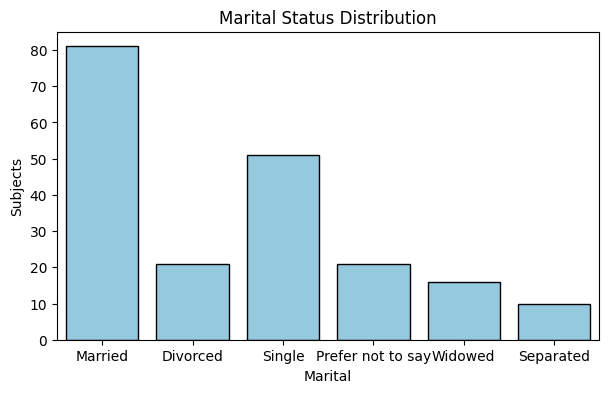

Marital status counts:
marital_labels
Married              81
Single               51
Divorced             21
Prefer not to say    21
Widowed              16
Separated            10
Name: count, dtype: int64


In [17]:
# [0] Single [1] Married [2] Divorced [3] Widowed [4] Separated [5] Prefer not to say

# Replace numeric codes with labels
marital_labels = {
    0: 'Single',
    1: 'Married',
    2: 'Divorced',
    3: 'Widowed',
    4: 'Separated',
    5: 'Prefer not to say'
}
new_df['marital_labels'] = new_df['marital'].map(marital_labels)

# Plot
plt.figure(figsize=(7, 4))
sns.countplot(data=new_df, x='marital_labels', color='skyblue',edgecolor='black')
plt.xlabel('Marital')
plt.ylabel('Subjects')
plt.title('Marital Status Distribution')
#plt.xticks(rotation=15)
plt.show()

# Print category counts
print("Marital status counts:")
print(new_df['marital_labels'].value_counts(dropna=False))

The largest group is Married (81), followed by Single (51), providing a strong basis for comparisons within these groups. 
The Divorced, Widowed, Separated, and Prefer not to say categories are less frequent, which may limit subgroup analysis but still contribute valuable diversity and context.

## Numeric variables

### Age

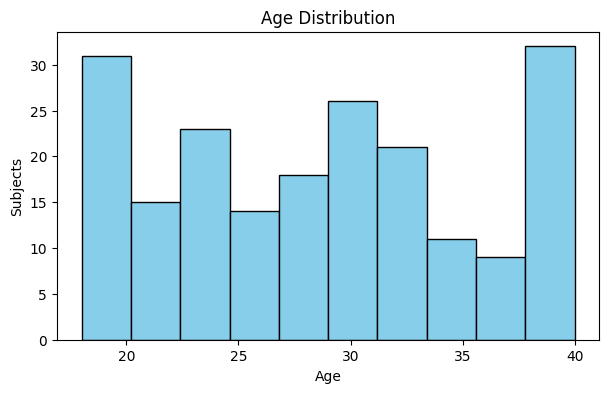

Shapiro-Wilk test statistic: 0.9423
P-value: 0.0000
The age distribution is NOT normal.


In [18]:
plt.figure(figsize=(7, 4))
plt.hist(new_df['age'], color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Subjects')
plt.title('Age Distribution')
plt.show()

stat, p_value = shapiro(new_df['age'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The age distribution is compatible with normality.")
else:
    print("The age distribution is NOT normal.")

There are noticeable peaks at both ends of the range, with higher counts for subjects around ages 18–20 and 39–40. The lowest frequencies occur in the mid-thirties (about 35–38)

### Income

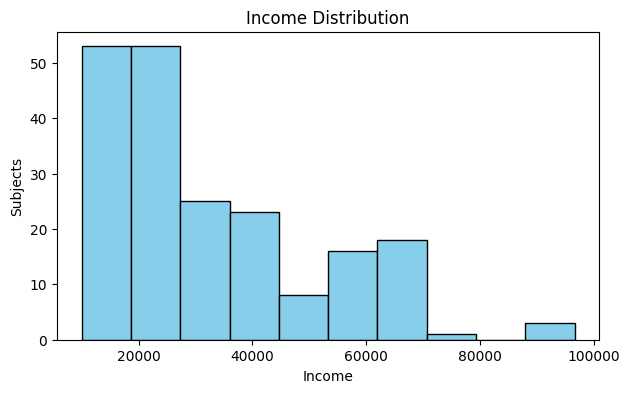

Shapiro-Wilk test statistic: 0.8894
P-value: 0.0000
The income distribution is NOT normal.


In [19]:
plt.figure(figsize=(7, 4))
plt.hist(new_df['income'], color='skyblue', edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Subjects')
plt.title('Income Distribution')
plt.show()

stat, p_value = shapiro(new_df['income'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The income distribution is compatible with normality.")
else:
    print("The income distribution is NOT normal.")

The distribution is clearly not normal, as indicated by the strong skewness and large number of low-income subjects compared to those with higher incomes.

The Shapiro-Wilk test statistic of 0.8894 and a p-value of 0.0000 confirm this visual impression, providing strong evidence against normality.

### Psychometric tests

**Cronbach’s Alpha**

Alpha was developed by Lee Cronbach in 195111 to provide a measure of the internal consistency of a test or scale; it is expressed as a number between 0 and 1. Internal consistency describes the extent to which all the items in a test measure the same concept or construct and hence it is connected to the inter-relatedness of the items within the test. 
If the Alpha is high (above 0.7 or 0.8), it means all the questions are basically measuring the same thing, so you can trust the sum or average as a reliable score for that concept.
https://pmc.ncbi.nlm.nih.gov/articles/PMC4205511/
https://how.dev/answers/how-to-implement-cronbachs-alpha-for-reliability-in-python

In [20]:
def cronbach_alpha(data):
    # Transform the data frame into a correlation matrix
    df_corr = data.corr()
    
    # Calculate N
    # The number of variables is equal to the number of columns in the dataframe
    N = data.shape[1]
    
    # Calculate r
    # For this, we'll loop through all the columns and append every relevant correlation to an array called 'r_s'. 
    # Then, we'll calculate the mean of 'r_s'.
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [21]:
# Make a copy to work on
df_simplified = new_df.copy()

#### IAT

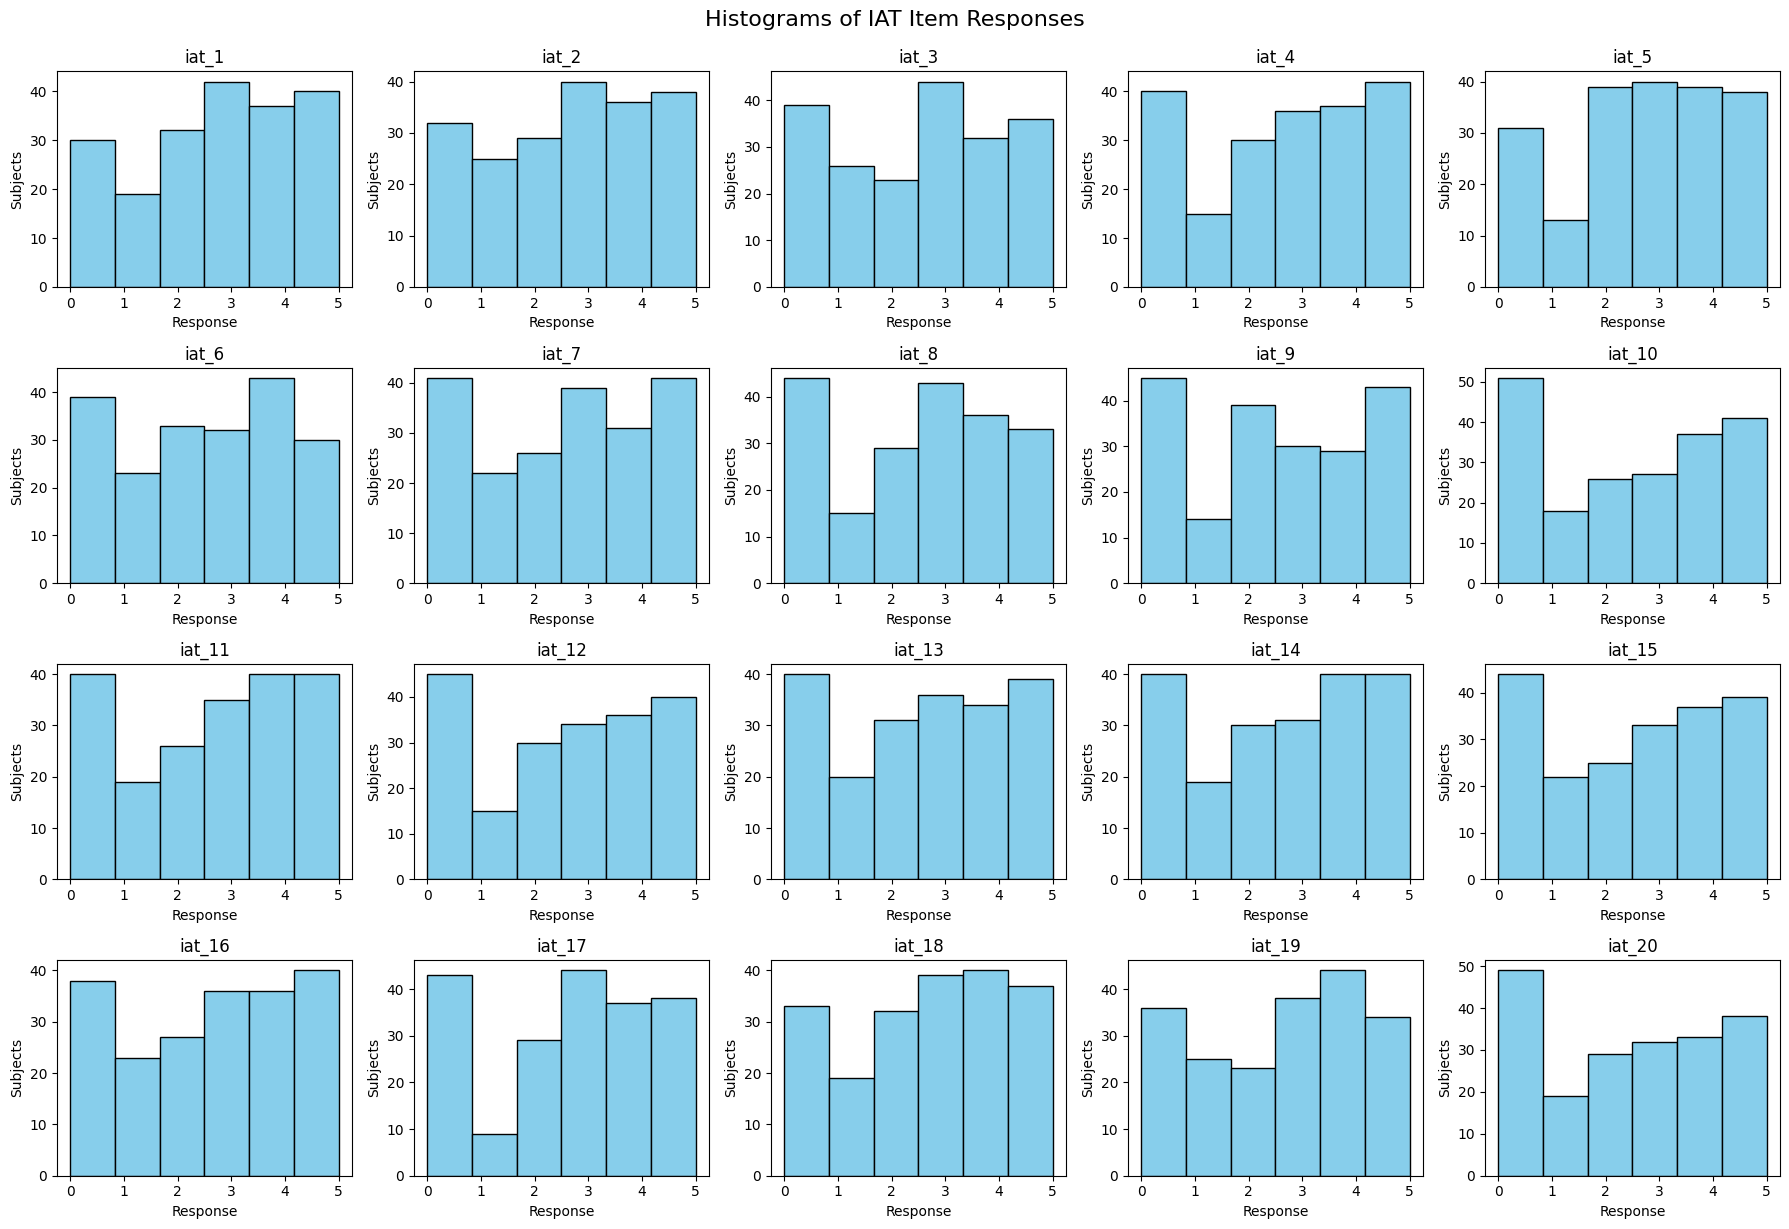

In [22]:
# Select only IAT columns
iat_item_cols = [f"iat_{i}" for i in range(1, 21)]
df_iat = df_simplified[iat_item_cols]

# Plot
n_items = len(iat_item_cols)
n_rows, n_cols = 4, 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()
# Histograms for each item
for idx, col in enumerate(iat_item_cols):
    axes[idx].hist(df_simplified[col], bins=6, color='skyblue', edgecolor='black')
    axes[idx].set_title(f"{col}")
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")
# Hide unused axes if any
for ax in axes[n_items:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle("Histograms of IAT Item Responses", fontsize=16, y=1.02)
plt.show()

In [23]:
df_iat.describe()

,iat_1,iat_2,iat_3,iat_4,iat_5,iat_6,iat_7,iat_8,iat_9,iat_10,iat_11,iat_12,iat_13,iat_14,iat_15,iat_16,iat_17,iat_18,iat_19,iat_20
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2.783920,2.685000,2.555556,2.705000,2.783920,2.532663,2.595960,2.550505,2.565000,2.517588,2.680000,2.605000,2.605000,2.658291,2.570000,2.645000,2.683417,2.725000,2.655000,2.475000
std,1.686048,1.714782,1.757809,1.789971,1.665054,1.729928,1.801279,1.755100,1.825496,1.891117,1.795472,1.820866,1.778988,1.797211,1.828062,1.781811,1.766601,1.704082,1.741014,1.842921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [24]:
c_alpha_iat = cronbach_alpha(df_iat)
print(f"Cronbach_alpha value: {c_alpha_iat:.4f}")

Cronbach_alpha value: 0.9729


Most items show broad usage of the full response scale, with medians generally between 2 and 4, and similar variability across the scale. 
The item-wise histograms reveal that although most items capture a full range of participant responses, some items display higher or lower frequencies at different response categories, highlighting unique response patterns.

The Cronbach’s alpha for the IAT in this sample is extremely high (α = 0.97), confirming excellent internal consistency and justifying use of the total score for further analysis.

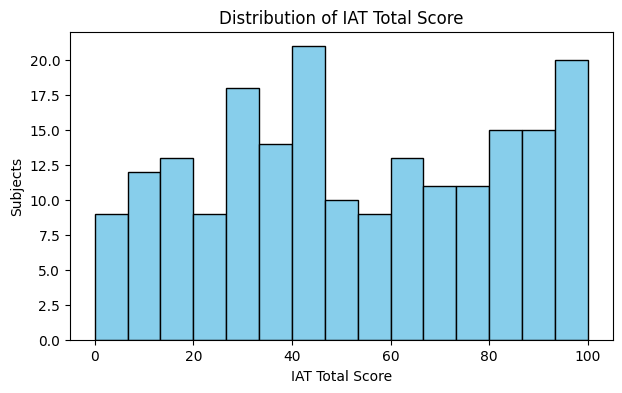

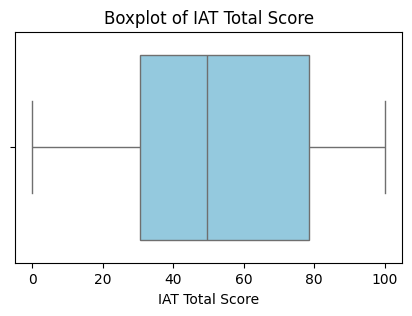

IAT total score summary statistics:
count    200.000000
mean      52.576819
std       28.821201
min        0.000000
25%       30.500000
50%       49.500000
75%       78.500000
max      100.000000
Name: iat_total, dtype: float64
Shapiro-Wilk test statistic: 0.9521
P-value: 0.0000
The IAT total score distribution significantly deviates from normality.


In [25]:
# Compute the total score
df_simplified['iat_total'] = df_simplified[iat_item_cols].sum(axis=1)

# Visualize histogram of total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['iat_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("IAT Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of IAT Total Score")
plt.show()

# Visualize boxplot of total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['iat_total'], color='skyblue')
plt.xlabel("IAT Total Score")
plt.title("Boxplot of IAT Total Score")
plt.show()

# Summary statistics
print("IAT total score summary statistics:")
print(df_simplified['iat_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['iat_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The IAT total score distribution is compatible with normality.")
else:
    print("The IAT total score distribution significantly deviates from normality.")

# Drop all IAT item columns from the new DataFrame
df_simplified = df_simplified.drop(columns=iat_item_cols)

The IAT total score demonstrates a wide range in your sample, with scores spanning from 0 to 100 and a mean of 52.6. The boxplot and histogram illustrate a non-normal, multimodal distribution—confirmed by the Shapiro-Wilk test (statistic = 0.95, p < 0.0001). Given the significant deviation from normality, non-parametric statistical methods are recommended for subsequent analyses involving the IAT total score.

Categories (Young, 1998; validation studies):

- Normal/Average user: IAT total < 40
- Problematic user: 40 ≤ IAT total < 70
- Severely problematic user: IAT total ≥ 70​

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_90936/3798497439.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Series(categories), palette='Blues', edgecolor='black')


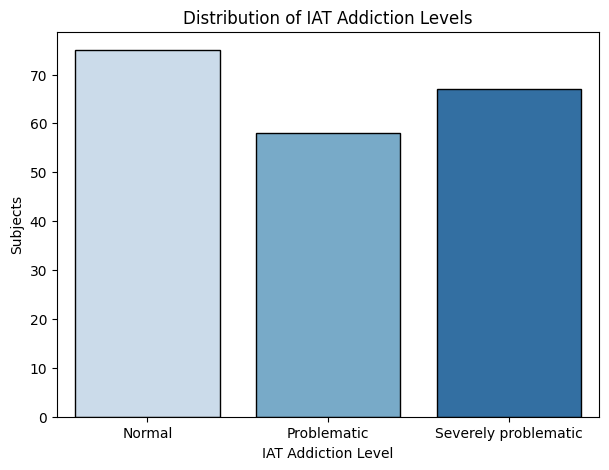

Normal                  75
Severely problematic    67
Problematic             58
Name: count, dtype: int64


In [26]:
categories = [
    "Normal" if score < 40 else
    "Problematic" if score < 70 else
    "Severely problematic"
    for score in df_simplified['iat_total']
]

plt.figure(figsize=(7, 5))
sns.countplot(x=pd.Series(categories), palette='Blues', edgecolor='black')
plt.xlabel('IAT Addiction Level')
plt.ylabel('Subjects')
plt.title('Distribution of IAT Addiction Levels')
plt.show()

# Print the counts for each category
print(pd.Series(categories).value_counts())

#### AUDIT

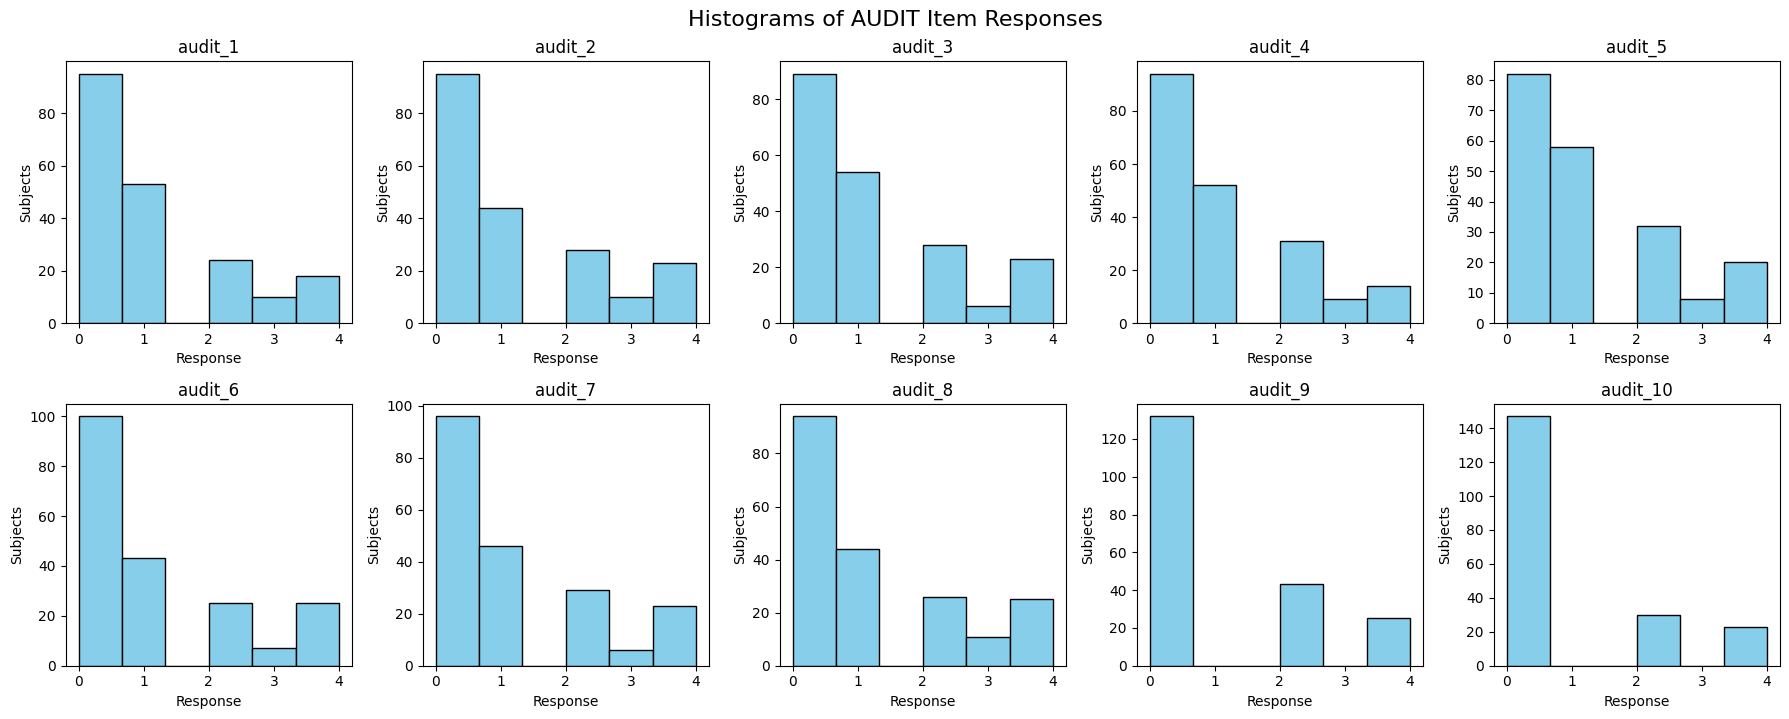

In [27]:
# Select only AUDIT columns
audit_item_cols = [f"audit_{i}" for i in range(1, 11)]
df_audit = df_simplified[audit_item_cols]  # or new_df if not already simplified

# Plot
n_items = len(audit_item_cols)
n_rows, n_cols = 2, 5  # 10 items: 2 rows x 5 columns grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 7))
axes = axes.flatten()
# Histograms for each AUDIT item
for idx, col in enumerate(audit_item_cols):
    axes[idx].hist(df_audit[col], bins=6, color='skyblue', edgecolor='black')
    axes[idx].set_title(f"{col}")
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")
# Hide unused axes if any
for ax in axes[n_items:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle("Histograms of AUDIT Item Responses", fontsize=16, y=1.02)
plt.show()


In [28]:
df_audit.describe()

,audit_1,audit_2,audit_3,audit_4,audit_5,audit_6,audit_7,audit_8,audit_9,audit_10
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1.015000,1.110000,1.100000,0.985000,1.130000,1.070000,1.070000,1.145000,0.930000,0.760000
std,1.269976,1.359094,1.318595,1.200827,1.273266,1.376435,1.335672,1.390555,1.416025,1.368122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [29]:
c_alpha_audit = cronbach_alpha(df_audit)
print(f"Cronbach_alpha value: {c_alpha_audit:.4f}")

Cronbach_alpha value: 0.9121


AUDIT items show a full range of responses, with means clustered around 1 and moderate variability. Most medians are 1 or less, consistent with population-level drinking patterns. The Cronbach's alpha is 0.91, indicating high internal consistency and supporting the use of the total score for further analysis.

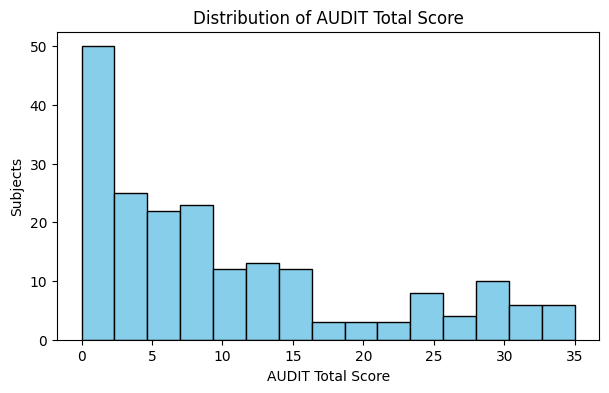

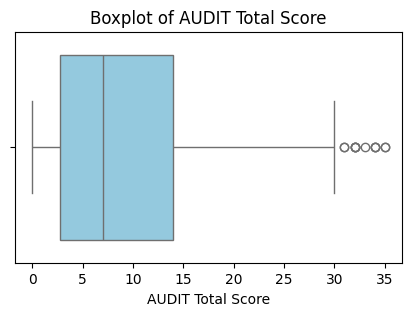

AUDIT total score summary statistics:
count    200.000000
mean      10.315000
std        9.970599
min        0.000000
25%        2.750000
50%        7.000000
75%       14.000000
max       35.000000
Name: audit_total, dtype: float64
Shapiro-Wilk test statistic: 0.8572
P-value: 0.0000
The AUDIT total score distribution significantly deviates from normality.


In [30]:
# Compute the total AUDIT score
df_simplified['audit_total'] = df_simplified[audit_item_cols].sum(axis=1)

# Visualize histogram of AUDIT total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['audit_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("AUDIT Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of AUDIT Total Score")
plt.show()

# Visualize boxplot of AUDIT total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['audit_total'], color='skyblue')
plt.xlabel("AUDIT Total Score")
plt.title("Boxplot of AUDIT Total Score")
plt.show()

# Summary statistics
print("AUDIT total score summary statistics:")
print(df_simplified['audit_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['audit_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The AUDIT total score distribution is compatible with normality.")
else:
    print("The AUDIT total score distribution significantly deviates from normality.")

# Drop all AUDIT item columns from the DataFrame
df_simplified = df_simplified.drop(columns=audit_item_cols)

The AUDIT total score demonstrates a wide range in your sample, with scores spanning from 0 to 35 and a mean of 10.3. The boxplot and histogram show a strongly right-skewed, non-normal distribution—which is confirmed by the Shapiro-Wilk test (statistic = 0.86, p < 0.0001). Given this significant deviation from normality, non-parametric statistical methods are recommended for analyses involving the AUDIT total score.

For the AUDIT scale, the most commonly used cut-offs are:
- Low risk: AUDIT total < 8
- Hazardous/harmful: 8 ≤ AUDIT total < 16
- Possible dependence: AUDIT total ≥ 16

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_90936/2498645151.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categories_series, palette=sns.color_palette("Blues", n_colors=3), edgecolor='black')


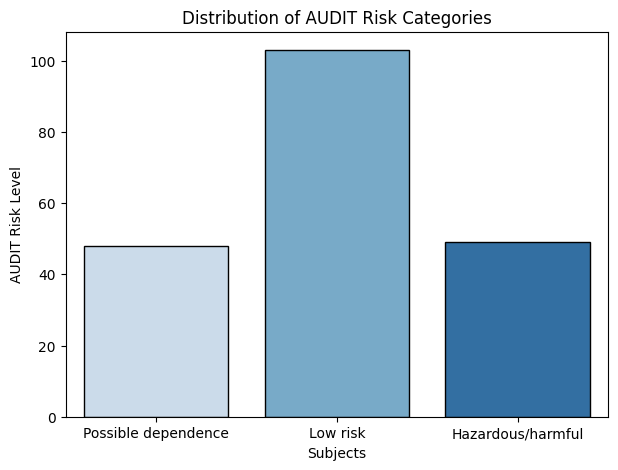

Low risk               103
Hazardous/harmful       49
Possible dependence     48
Name: count, dtype: int64


In [31]:
categories = [
    "Low risk" if score < 8 else
    "Hazardous/harmful" if score < 16 else
    "Possible dependence"
    for score in df_simplified['audit_total']
]

categories_series = pd.Series(categories, name='AUDIT Risk Level')

plt.figure(figsize=(7, 5))
sns.countplot(x=categories_series, palette=sns.color_palette("Blues", n_colors=3), edgecolor='black')
plt.xlabel('Subjects')
plt.ylabel('AUDIT Risk Level')
plt.title('Distribution of AUDIT Risk Categories')
plt.show()

# Print the counts for each category
print(pd.Series(categories).value_counts())


#### DAST

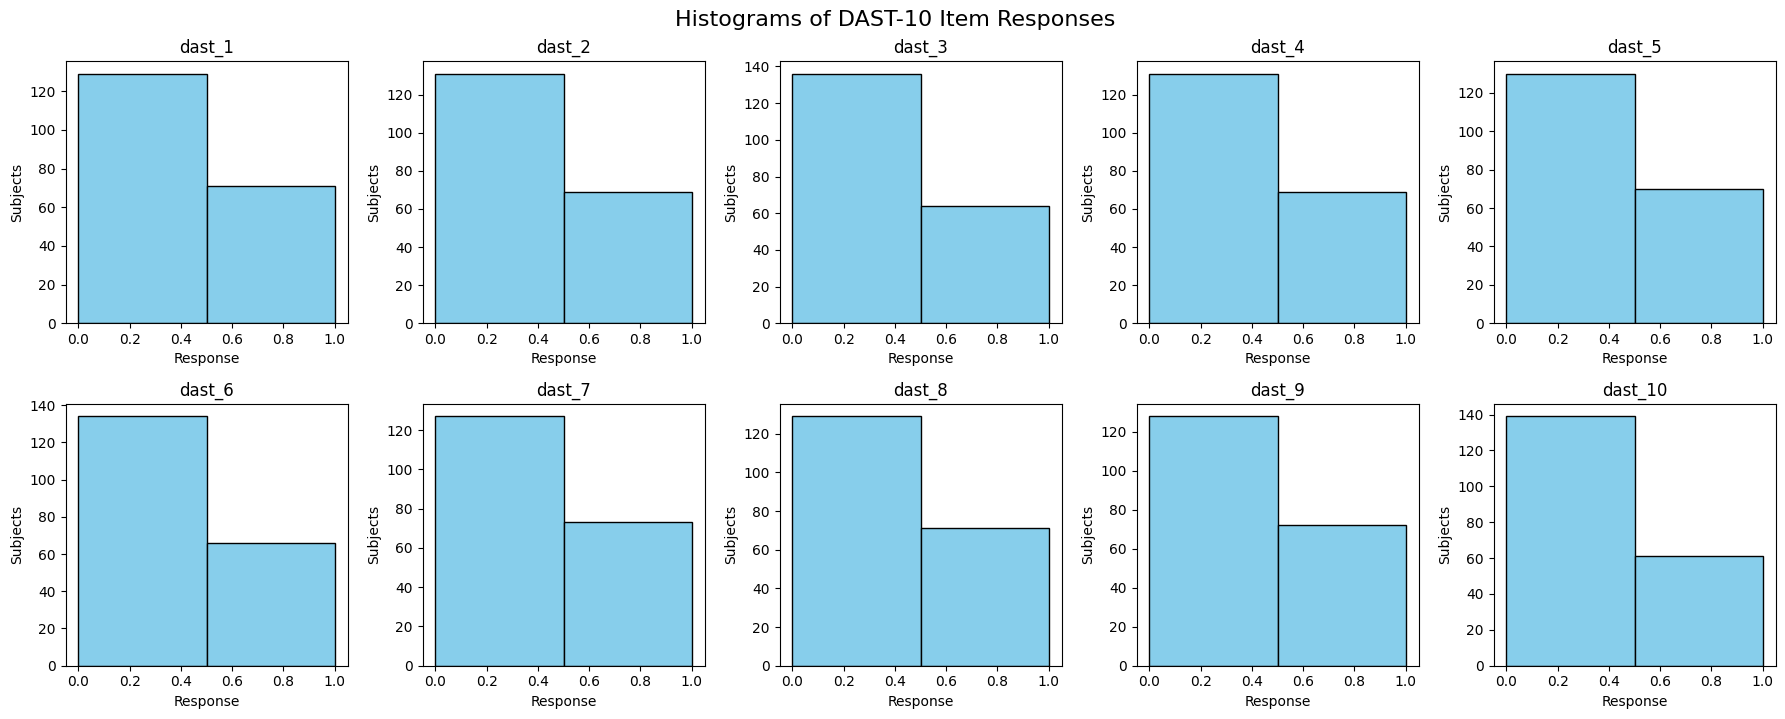

In [32]:
# Select only DAST-10 item columns
dast_item_cols = [f"dast_{i}" for i in range(1, 11)]
df_dast = df_simplified[dast_item_cols]  # or new_df if not already simplified

# Plot setup
n_items = len(dast_item_cols)
n_rows, n_cols = 2, 5  # 10 items: 2 rows x 5 columns grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 7))
axes = axes.flatten()

# Histograms for each DAST item
for idx, col in enumerate(dast_item_cols):
    axes[idx].hist(df_dast[col], bins=2, color='skyblue', edgecolor='black')  # DAST items are 0/1
    axes[idx].set_title(f"{col}")
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")
# Hide unused axes if any
for ax in axes[n_items:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle("Histograms of DAST-10 Item Responses", fontsize=16, y=1.02)
plt.show()


In [33]:
df_dast.describe()

,dast_1,dast_2,dast_3,dast_4,dast_5,dast_6,dast_7,dast_8,dast_9,dast_10
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.355000,0.345000,0.320000,0.345000,0.350000,0.330000,0.365000,0.355000,0.360000,0.305000
std,0.479714,0.476561,0.467647,0.476561,0.478167,0.471393,0.482638,0.479714,0.481205,0.461563
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
c_alpha_dast = cronbach_alpha(df_dast)
print(f"Cronbach_alpha value: {c_alpha_audit:.4f}")

Cronbach_alpha value: 0.9121


DAST-10 items show balanced use of the binary response options, with means around 0.3–0.37 and interquartile ranges from 0 to 1 for all items. This indicates that each question contributes information about the presence or absence of drug-related problems across participants. The Cronbach’s alpha of 0.91 demonstrates excellent internal consistency, consistent with published DAST-10 psychometric studies, and supports using the summed DAST-10 total score as a reliable indicator of drug abuse severity in subsequent analyses.

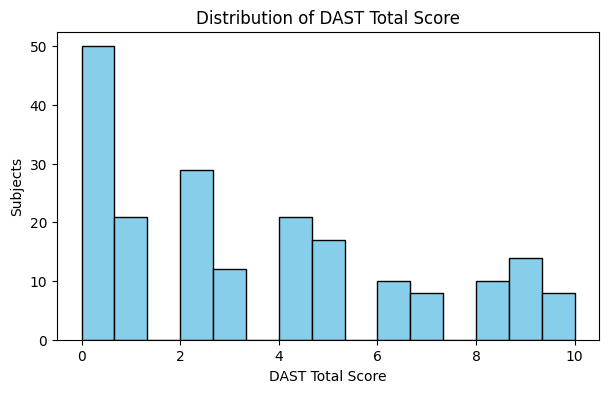

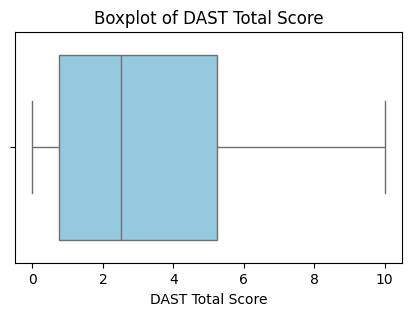

DAST total score summary statistics:
count    200.000000
mean       3.430000
std        3.153542
min        0.000000
25%        0.750000
50%        2.500000
75%        5.250000
max       10.000000
Name: dast_total, dtype: float64
Shapiro-Wilk test statistic: 0.8869
P-value: 0.0000
The DAST total score distribution significantly deviates from normality.


In [35]:
# Compute the total DAST score
df_simplified['dast_total'] = df_simplified[dast_item_cols].sum(axis=1)

# Visualize histogram of DAST total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['dast_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("DAST Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of DAST Total Score")
plt.show()

# Visualize boxplot of DAST total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['dast_total'], color='skyblue')
plt.xlabel("DAST Total Score")
plt.title("Boxplot of DAST Total Score")
plt.show()

# Summary statistics
print("DAST total score summary statistics:")
print(df_simplified['dast_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['dast_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The DAST total score distribution is compatible with normality.")
else:
    print("The DAST total score distribution significantly deviates from normality.")

# Drop all DAST item columns from the DataFrame
df_simplified = df_simplified.drop(columns=dast_item_cols)

The DAST total score in your sample ranges from 0 to 10 with a mean of 3.4, indicating generally low-to-moderate levels of drug-related problems. The histogram and boxplot reveal a markedly right-skewed distribution, with many participants scoring near 0 and fewer at higher scores. This visual pattern is confirmed by the Shapiro–Wilk test (statistic = 0.89, p < 0.0001), showing a clear deviation from normality; therefore, non-parametric methods or categorical risk levels are recommended for analyses involving the DAST total score.

Based on the DAST‑10 literature, a common categorization is:​
- 0: No problems
- 1–2: Low level
- 3–5: Moderate level
- ≥6: Severe level

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_90936/1651799925.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


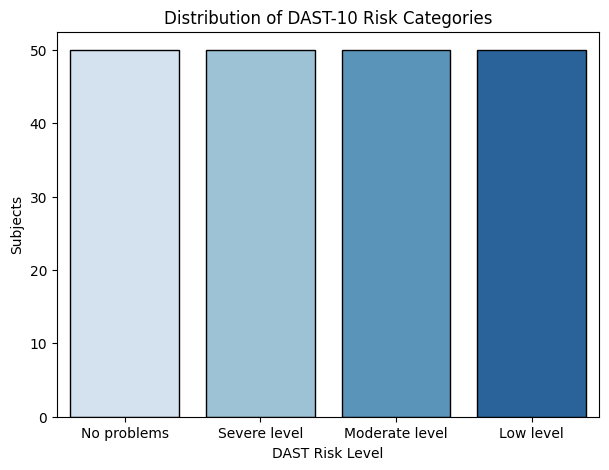

DAST Risk Level
No problems       50
Severe level      50
Moderate level    50
Low level         50
Name: count, dtype: int64


In [36]:
# Create DAST risk categories from total score (0–10)
dast_categories = [
    "No problems" if score == 0 else
    "Low level" if score <= 2 else
    "Moderate level" if score <= 5 else
    "Severe level"
    for score in df_simplified['dast_total']
]

dast_cat_series = pd.Series(dast_categories, name='DAST Risk Level')

plt.figure(figsize=(7, 5))
sns.countplot(
    x=dast_cat_series,
    palette=sns.color_palette("Blues", n_colors=4),
    edgecolor='black'
)
plt.xlabel('DAST Risk Level')
plt.ylabel('Subjects')
plt.title('Distribution of DAST-10 Risk Categories')
plt.show()

print(dast_cat_series.value_counts())


#### PGSI

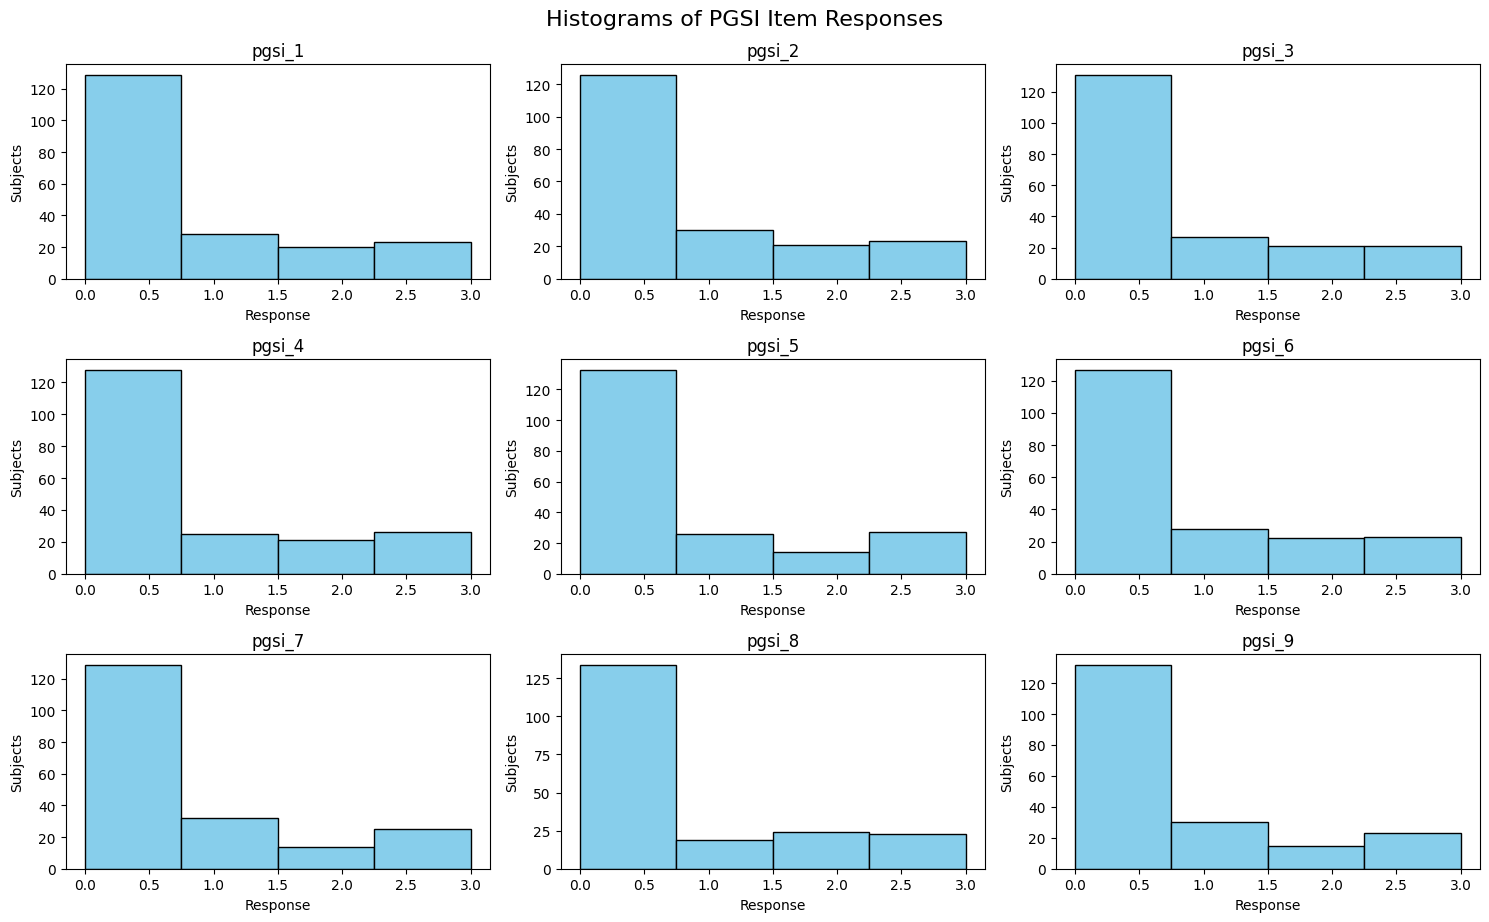

In [37]:
# Select only PGSI item columns (assuming pgsi_1 ... pgsi_9)
pgsi_item_cols = [f"pgsi_{i}" for i in range(1, 10)]
df_pgsi = df_simplified[pgsi_item_cols]  # or new_df if not simplified

# Plot setup
n_items = len(pgsi_item_cols)
n_rows, n_cols = 3, 3  # 9 items: 3 rows x 3 columns grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 9))
axes = axes.flatten()

# Histograms for each PGSI item
for idx, col in enumerate(pgsi_item_cols):
    axes[idx].hist(df_pgsi[col], bins=4, color='skyblue', edgecolor='black')  # responses 0–3
    axes[idx].set_title(col)
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")

# Hide unused axes if any
for ax in axes[n_items:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle("Histograms of PGSI Item Responses", fontsize=16, y=1.02)
plt.show()


In [38]:
df_pgsi.describe()

,pgsi_1,pgsi_2,pgsi_3,pgsi_4,pgsi_5,pgsi_6,pgsi_7,pgsi_8,pgsi_9
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,0.685000,0.705000,0.660000,0.725000,0.67500,0.705000,0.675000,0.680000,0.645000
std,1.054197,1.055245,1.034287,1.093321,1.08409,1.059997,1.055912,1.073949,1.036507
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000


In [39]:
c_alpha_pgsi = cronbach_alpha(df_pgsi)
print(f"Cronbach_alpha value: {c_alpha_audit:.4f}")

Cronbach_alpha value: 0.9121


The PGSI items display the expected skewed pattern for problem gambling screens: most responses cluster at 0, with progressively fewer endorsements of higher categories (1–3). Item means are all below 1, and quartiles show that at least half of the sample scores 0 on every item, indicating that gambling-related problems are relatively infrequent in this dataset. The Cronbach’s alpha of 0.91 reflects excellent internal consistency, consistent with published PGSI psychometric studies, supporting the use of the summed PGSI total score as a reliable measure of gambling problem severity in subsequent analyses.​

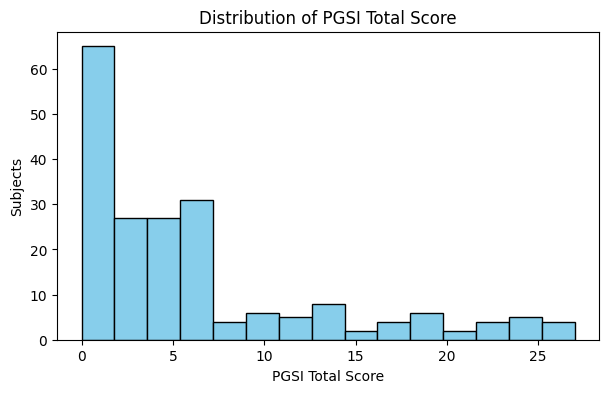

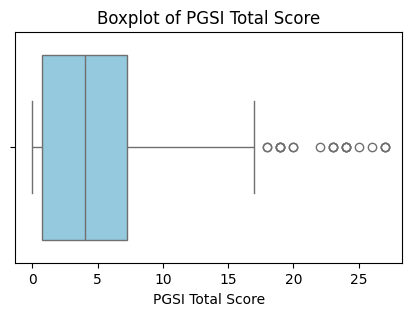

PGSI total score summary statistics:
count    200.000000
mean       6.155000
std        7.018352
min        0.000000
25%        0.750000
50%        4.000000
75%        7.250000
max       27.000000
Name: pgsi_total, dtype: float64
Shapiro-Wilk test statistic: 0.8101
P-value: 0.0000
The PGSI total score distribution significantly deviates from normality.


In [40]:
# Compute the total PGSI score
df_simplified['pgsi_total'] = df_simplified[pgsi_item_cols].sum(axis=1)

# Visualize histogram of PGSI total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['pgsi_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("PGSI Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of PGSI Total Score")
plt.show()

# Visualize boxplot of PGSI total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['pgsi_total'], color='skyblue')
plt.xlabel("PGSI Total Score")
plt.title("Boxplot of PGSI Total Score")
plt.show()

# Summary statistics
print("PGSI total score summary statistics:")
print(df_simplified['pgsi_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['pgsi_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The PGSI total score distribution is compatible with normality.")
else:
    print("The PGSI total score distribution significantly deviates from normality.")

# Drop all PGSI item columns from the DataFrame
df_simplified = df_simplified.drop(columns=pgsi_item_cols)

The PGSI total score shows a broad range from 0 to 27, with a mean of 6.2 and an interquartile range roughly between 1 and 7.3. The histogram and boxplot indicate a strongly right-skewed distribution with many low scores and a tail of higher scores, including several outliers at the upper end. The Shapiro–Wilk test (statistic = 0.81, p < 0.0001) confirms a clear deviation from normality, so non-parametric methods or PGSI risk categories should be used for subsequent analyses involving this total score.

For PGSI, standard risk categories are:
- 0: Non‑problem gambling
- 1–2: Low risk
- 3–7: Moderate risk
- ≥8: Problem gambling

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_90936/3790844576.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


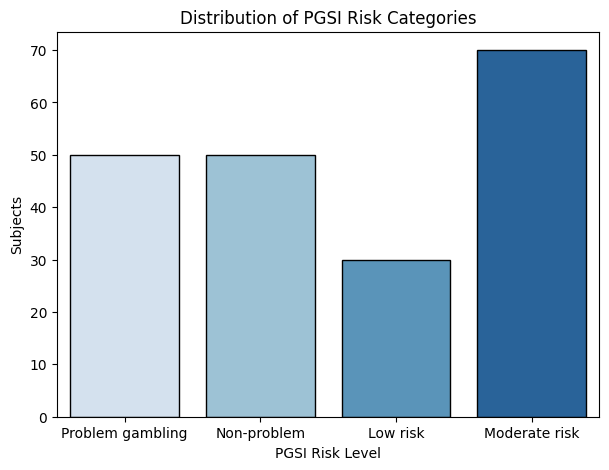

PGSI Risk Level
Moderate risk       70
Problem gambling    50
Non-problem         50
Low risk            30
Name: count, dtype: int64


In [41]:
# Create PGSI risk categories from total score (0–27)
pgsi_categories = [
    "Non-problem" if score == 0 else
    "Low risk" if score <= 2 else
    "Moderate risk" if score <= 7 else
    "Problem gambling"
    for score in df_simplified['pgsi_total']
]

pgsi_cat_series = pd.Series(pgsi_categories, name='PGSI Risk Level')

plt.figure(figsize=(7, 5))
sns.countplot(
    x=pgsi_cat_series,
    palette=sns.color_palette("Blues", n_colors=4),
    edgecolor='black'
)
plt.xlabel('PGSI Risk Level')
plt.ylabel('Subjects')
plt.title('Distribution of PGSI Risk Categories')
plt.show()

print(pgsi_cat_series.value_counts())

#### PCL5

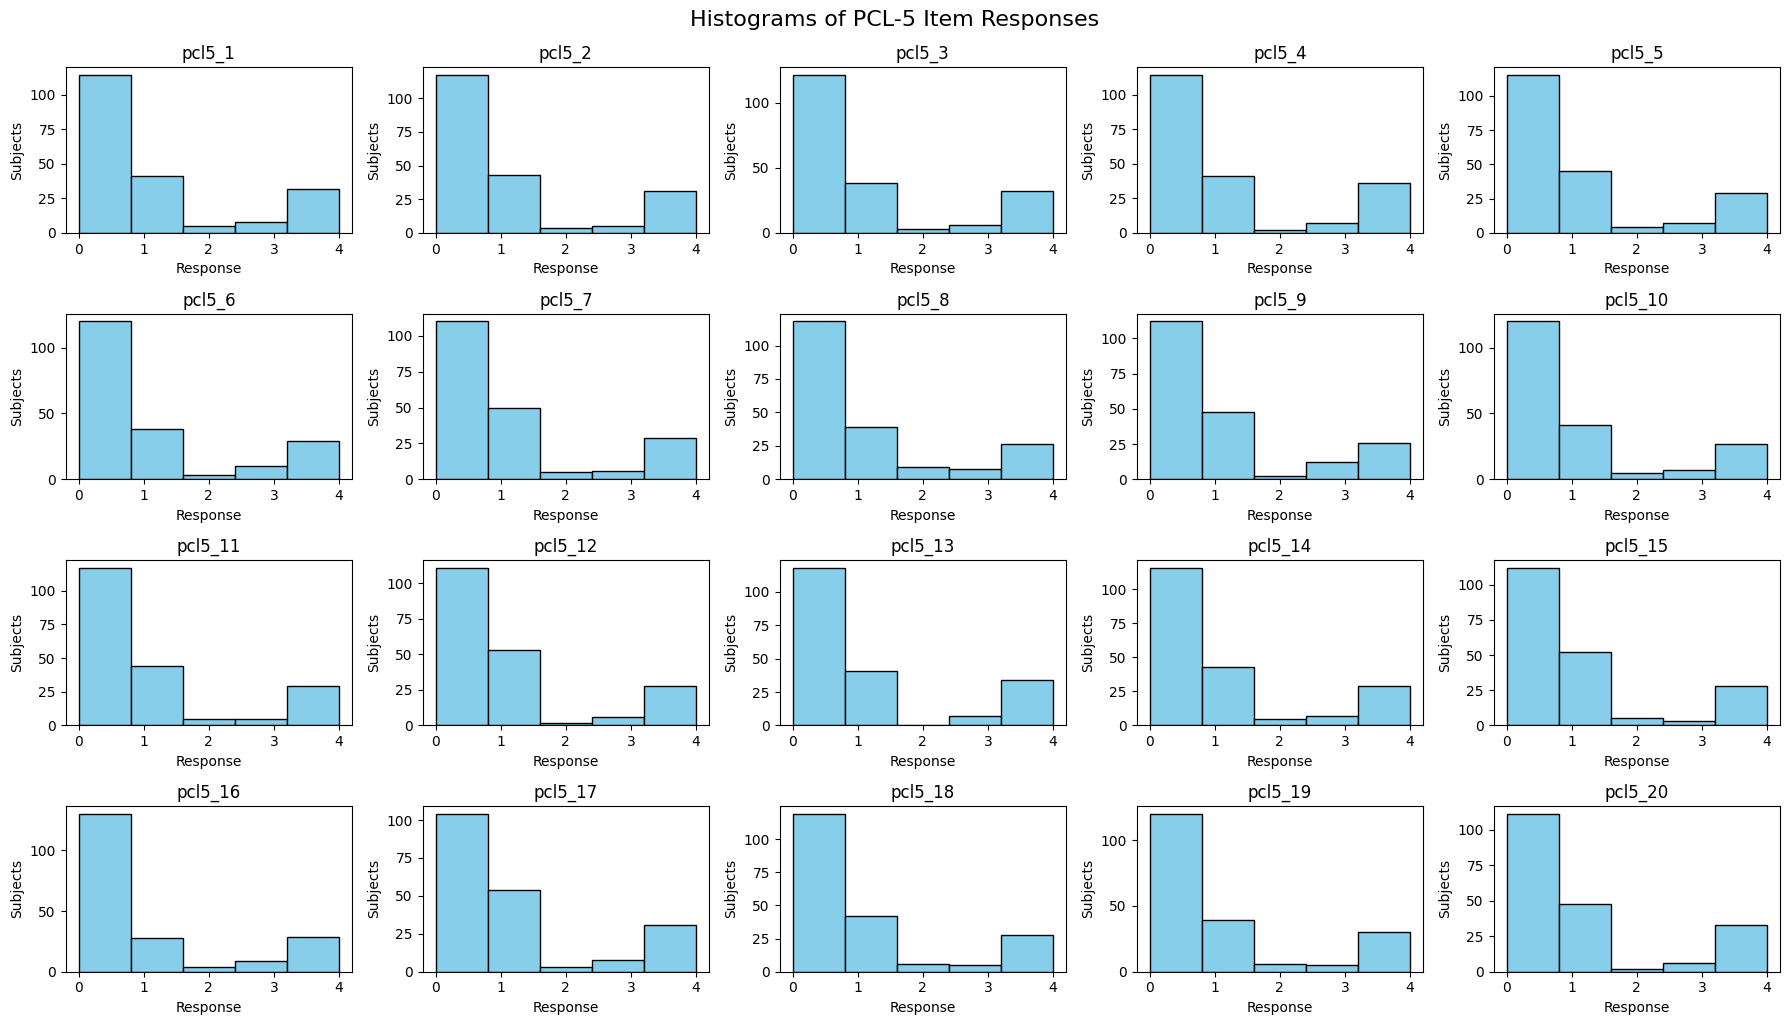

In [42]:
# Select only PCL-5 item columns
pcl5_item_cols = [f"pcl5_{i}" for i in range(1, 21)]
df_pcl5 = df_simplified[pcl5_item_cols]  # or new_df if not simplified

# Plot setup
n_items = len(pcl5_item_cols)
n_rows, n_cols = 4, 5  # 20 items: 4 rows x 5 columns grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

# Histograms for each PCL-5 item
for idx, col in enumerate(pcl5_item_cols):
    axes[idx].hist(df_pcl5[col], bins=5, color='skyblue', edgecolor='black')  # responses 0–4
    axes[idx].set_title(col)
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")

# Hide unused axes if any
for ax in axes[n_items:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle("Histograms of PCL-5 Item Responses", fontsize=16, y=1.02)
plt.show()

In [43]:
# Descriptive statistics
print(df_pcl5.describe())

           pcl5_1      pcl5_2      pcl5_3      pcl5_4      pcl5_5      pcl5_6  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     1.015000    0.950000    0.950000    1.050000    0.950000    0.950000   
std      1.485195    1.451909    1.479338    1.532725    1.430992    1.458815   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

           pcl5_7      pcl5_8      pcl5_9     pcl5_10     pcl5_11     pcl5_12  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     0.970000    0.925000    0.960000    0.900000    0.925000    0.935000   
std      1.417443    1.4032

In [44]:
# Cronbach's alpha for PCL-5
c_alpha_pcl5 = cronbach_alpha(df_pcl5)
print(f"Cronbach_alpha value: {c_alpha_pcl5:.4f}")

Cronbach_alpha value: 0.9817


PCL‑5 items show that most people in the sample chose 0 (“Not at all”) on each PCL‑5 item, and fewer people chose higher scores from 1 to 4. The average score for every item is around 1, and at least half of the participants scored 0 on each question. The Cronbach’s alpha of 0.98 shows that the 20 items are extremely consistent with each other, so the PCL‑5 total score is a very reliable measure of PTSD symptoms in this dataset, supporting the use of the summed PCL‑5 total score. 

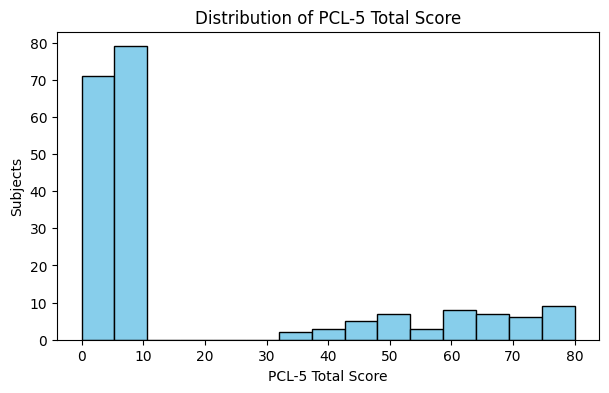

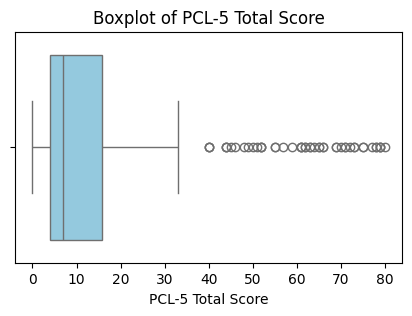

PCL-5 total score summary statistics:
count    200.000000
mean      19.115000
std       24.882877
min        0.000000
25%        4.000000
50%        7.000000
75%       15.750000
max       80.000000
Name: pcl5_total, dtype: float64
Shapiro-Wilk test statistic: 0.6864
P-value: 0.0000
The PCL-5 total score distribution significantly deviates from normality.


In [45]:
# Compute the total PCL-5 score
df_simplified['pcl5_total'] = df_simplified[pcl5_item_cols].sum(axis=1)

# Visualize histogram of PCL-5 total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['pcl5_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("PCL-5 Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of PCL-5 Total Score")
plt.show()

# Visualize boxplot of PCL-5 total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['pcl5_total'], color='skyblue')
plt.xlabel("PCL-5 Total Score")
plt.title("Boxplot of PCL-5 Total Score")
plt.show()

# Summary statistics
print("PCL-5 total score summary statistics:")
print(df_simplified['pcl5_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['pcl5_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The PCL-5 total score distribution is compatible with normality.")
else:
    print("The PCL-5 total score distribution significantly deviates from normality.")

# Drop all PCL-5 item columns from the DataFrame
df_simplified = df_simplified.drop(columns=pcl5_item_cols)


The PCL‑5 total scores range from 0 to 80, with an average of about 19 points, so most people report relatively low to moderate PTSD symptoms. The histogram and boxplot show a right‑skewed pattern: many participants score in the low range, while a smaller group has very high scores, creating a long tail and many outliers. The Shapiro–Wilk test (statistic = 0.69, p < 0.0001) confirms that the PCL‑5 total score is far from normally distributed, so non‑parametric methods or the recommended clinical cut‑off (for example, ≥33 as “probable PTSD”) should be used instead of tests that assume normality.

Each of the 20 items is scored 0–4 and summed to a total score from 0 to 80.​

A total score of 33 or higher is commonly used as a provisional PTSD diagnosis cut-off (i.e., “likely PTSD” vs “below threshold”).

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_90936/2980194543.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


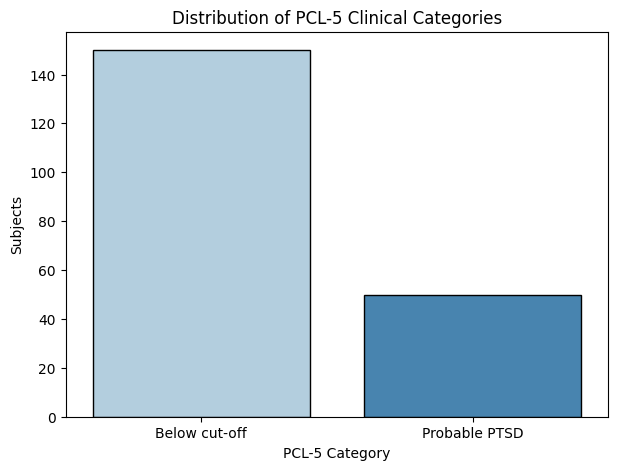

PCL-5 Category
Below cut-off    150
Probable PTSD     50
Name: count, dtype: int64


In [46]:
# PCL-5 categories based on total score (0–80)
pcl5_categories = [
    "Below cut-off" if score < 33 else
    "Probable PTSD"
    for score in df_simplified['pcl5_total']
]

pcl5_cat_series = pd.Series(pcl5_categories, name='PCL-5 Category')

plt.figure(figsize=(7, 5))
sns.countplot(
    x=pcl5_cat_series,
    palette=sns.color_palette("Blues", n_colors=2),
    edgecolor='black'
)
plt.xlabel('PCL-5 Category')
plt.ylabel('Subjects')
plt.title('Distribution of PCL-5 Clinical Categories')
plt.show()

print(pcl5_cat_series.value_counts())

#### MSPSS

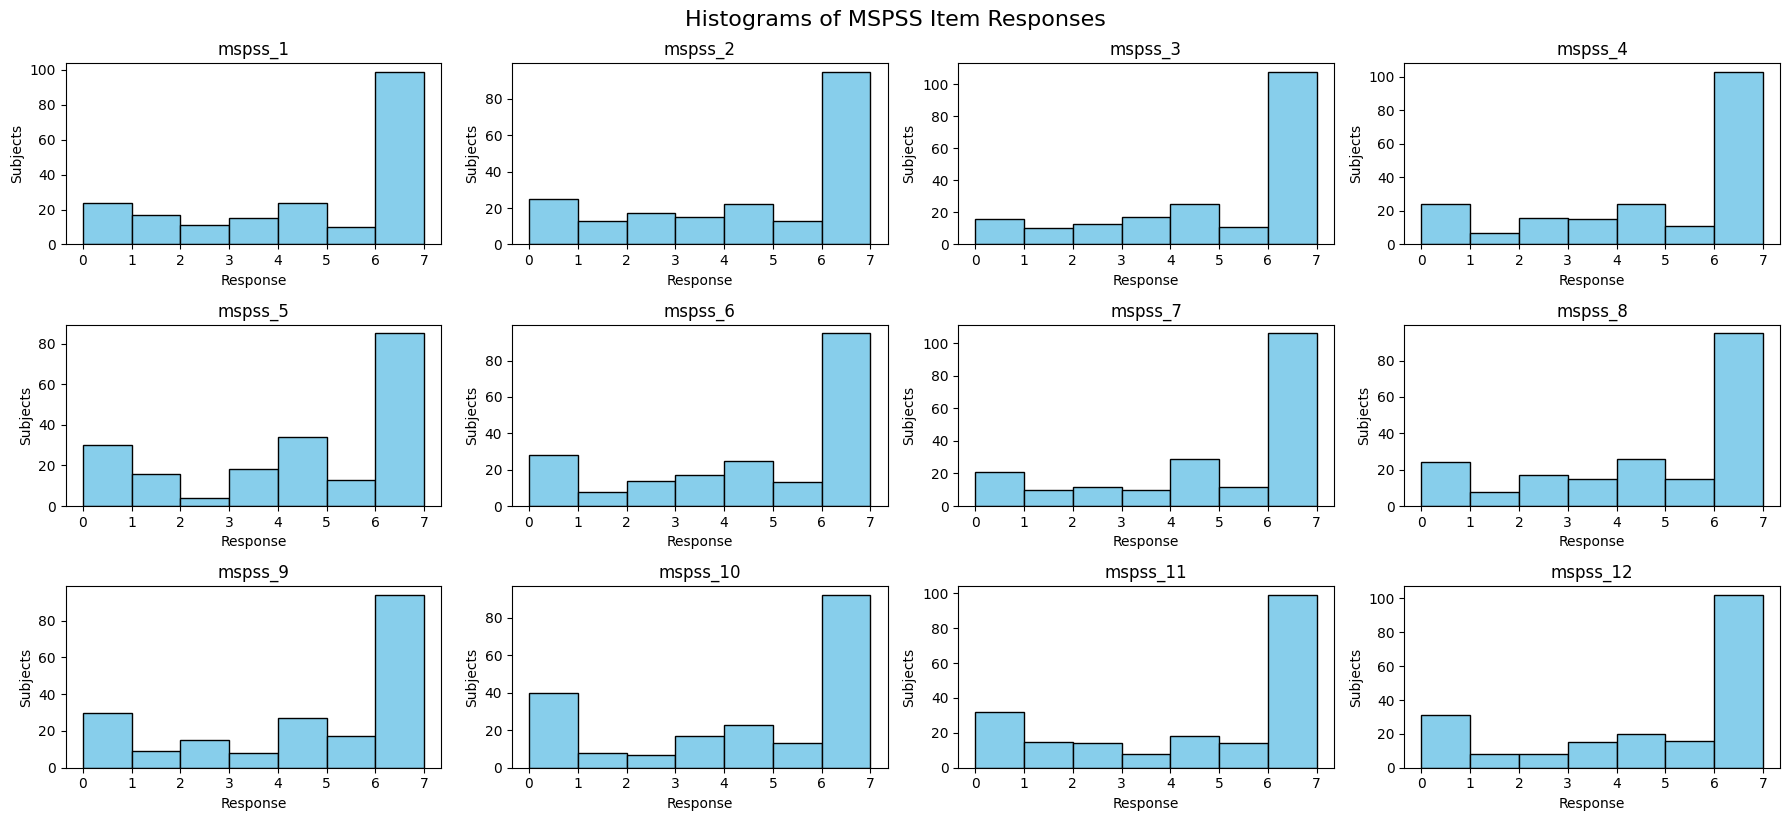

In [47]:
# Select only MSPSS item columns
mspss_item_cols = [f"mspss_{i}" for i in range(1, 13)]
df_mspss = df_simplified[mspss_item_cols]  # or new_df if not simplified

# Plot setup
n_items = len(mspss_item_cols)
n_rows, n_cols = 3, 4  # 12 items: 3 rows x 4 columns grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 8))
axes = axes.flatten()

# Histograms for each MSPSS item
for idx, col in enumerate(mspss_item_cols):
    axes[idx].hist(df_mspss[col], bins=7, color='skyblue', edgecolor='black')  # responses 1–7
    axes[idx].set_title(col)
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")

# Hide unused axes if any
for ax in axes[n_items:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle("Histograms of MSPSS Item Responses", fontsize=16, y=1.02)
plt.show()


In [48]:
# Descriptive statistics
print(df_mspss.describe())

          mspss_1     mspss_2     mspss_3     mspss_4     mspss_5     mspss_6  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     4.440000    4.380000    4.815000    4.615000    4.192893    4.430000   
std      2.539418    2.525369    2.340548    2.479418    2.504940    2.525269   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    2.000000    3.000000    3.000000    2.750000    2.750000   
50%      5.000000    5.000000    6.000000    6.000000    4.192893    5.000000   
75%      7.000000    7.000000    7.000000    7.000000    6.000000    7.000000   
max      7.000000    7.000000    7.000000    7.000000    7.000000    7.000000   

          mspss_7     mspss_8     mspss_9    mspss_10    mspss_11    mspss_12  
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000  
mean     4.700000    4.485000    4.420000    4.206030    4.315000    4.530000  
std      2.395557    2.447391 

In [49]:
# Cronbach's alpha for MSPSS
c_alpha_pcl5 = cronbach_alpha(df_mspss)
print(f"Cronbach_alpha value: {c_alpha_pcl5:.4f}")

Cronbach_alpha value: 0.8824


MSPSS item scores are generally in the mid–high range, with medians around 4–6 on the 0–7 scale, indicating moderate to high perceived social support in this sample. Variability is substantial (standard deviations about 2.4–2.7), showing that support levels differ meaningfully across participants. The Cronbach’s alpha of 0.88 indicates good internal consistency, so the MSPSS total (and subscale) scores can be considered reliable measures of perceived social support.

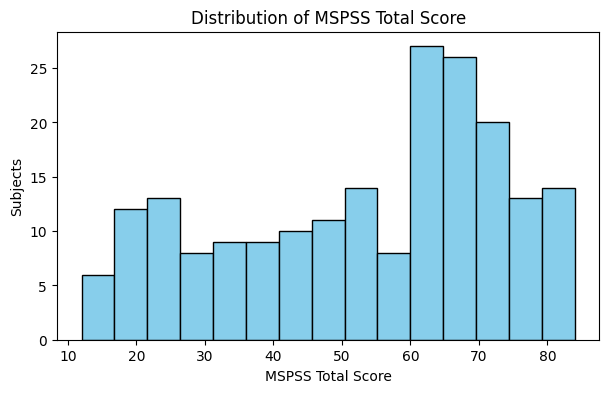

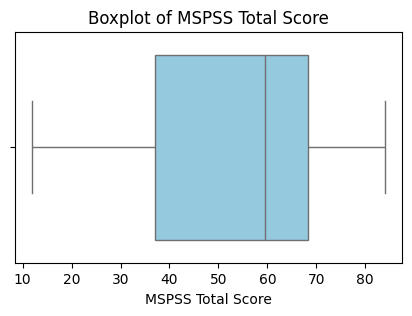

MSPSS total score summary statistics:
count    200.000000
mean      53.528924
std       19.946584
min       12.000000
25%       37.000000
50%       59.500000
75%       68.250000
max       84.000000
Name: mspss_total, dtype: float64
Shapiro-Wilk test statistic: 0.9396
P-value: 0.0000
The MSPSS total score distribution significantly deviates from normality.


In [50]:
# Compute the total MSPSS score
mspss_item_cols = [f"mspss_{i}" for i in range(1, 13)]
df_simplified['mspss_total'] = df_simplified[mspss_item_cols].sum(axis=1)

# Visualize histogram of MSPSS total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['mspss_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("MSPSS Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of MSPSS Total Score")
plt.show()

# Visualize boxplot of MSPSS total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['mspss_total'], color='skyblue')
plt.xlabel("MSPSS Total Score")
plt.title("Boxplot of MSPSS Total Score")
plt.show()

# Summary statistics
print("MSPSS total score summary statistics:")
print(df_simplified['mspss_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['mspss_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The MSPSS total score distribution is compatible with normality.")
else:
    print("The MSPSS total score distribution significantly deviates from normality.")

# Drop all MSPSS item columns from the DataFrame
df_simplified = df_simplified.drop(columns=mspss_item_cols)


MSPSS total scores range from 12 to 84, with a mean of about 53.5, indicating generally moderate to high perceived social support in this sample. The histogram and boxplot show a right‑skewed distribution, with many participants scoring in the higher support range and fewer at very low scores. The Shapiro–Wilk test (statistic = 0.94, p < 0.001) confirms that the MSPSS total score is not normally distributed, so non‑parametric tests or category-based analyses (low, moderate, high support) are more appropriate than parametric methods that assume normality.​

MSPSS does not have universal clinical cut-offs, but the original guidelines often use three bands based on the mean item score (total score ÷ 12):
- Mean 1–2.9: Low support
- Mean 3–5: Moderate support
- Mean 5.1–7: High support

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_90936/1096084786.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


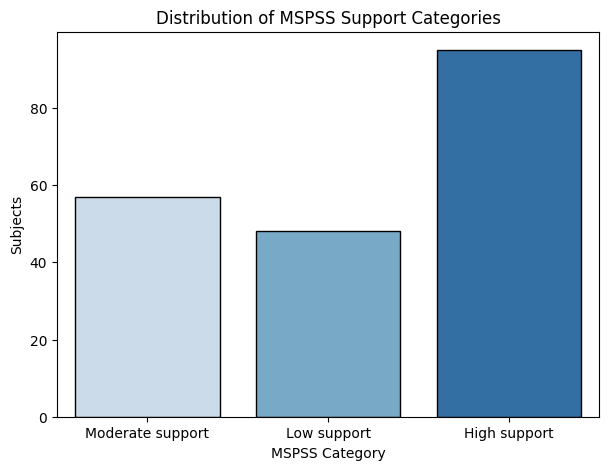

MSPSS Category
High support        95
Moderate support    57
Low support         48
Name: count, dtype: int64


In [51]:
# Compute mean item score
mspss_mean = df_simplified['mspss_total'] / 12.0

# MSPSS categories based on mean item score
mspss_categories = [
    "Low support" if m < 3 else
    "Moderate support" if m <= 5 else
    "High support"
    for m in mspss_mean
]

mspss_cat_series = pd.Series(mspss_categories, name='MSPSS Category')

plt.figure(figsize=(7, 5))
sns.countplot(
    x=mspss_cat_series,
    palette=sns.color_palette("Blues", n_colors=3),
    edgecolor='black'
)
plt.xlabel('MSPSS Category')
plt.ylabel('Subjects')
plt.title('Distribution of MSPSS Support Categories')
plt.show()

print(mspss_cat_series.value_counts())


#### SWLS

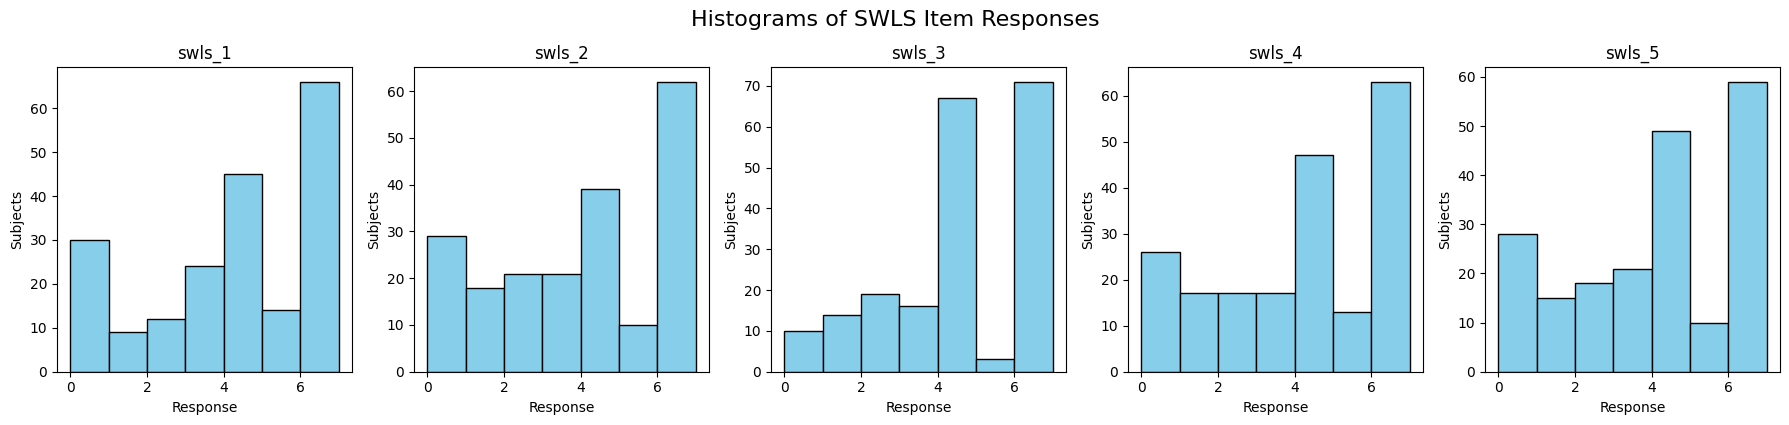

In [52]:
# Select only SWLS item columns
swls_item_cols = [f"swls_{i}" for i in range(1, 6)]
df_swls = df_simplified[swls_item_cols]  # or new_df if not simplified

# Plot setup
n_items = len(swls_item_cols)
n_rows, n_cols = 1, 5  # 5 items: 1 row x 5 columns grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4))
axes = axes.flatten()

# Histograms for each SWLS item
for idx, col in enumerate(swls_item_cols):
    axes[idx].hist(df_swls[col], bins=7, color='skyblue', edgecolor='black')  # responses 1–7
    axes[idx].set_title(col)
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")

plt.tight_layout()
plt.suptitle("Histograms of SWLS Item Responses", fontsize=16, y=1.05)
plt.show()


In [53]:
# Descriptive statistics
print(df_swls.describe())

          swls_1      swls_2      swls_3      swls_4      swls_5
count  200.00000  200.000000  200.000000  200.000000  200.000000
mean     3.92000    3.658291    4.211055    3.844221    3.740000
std      2.32392    2.366818    2.031332    2.338417    2.327981
min      0.00000    0.000000    0.000000    0.000000    0.000000
25%      2.00000    2.000000    3.000000    2.000000    2.000000
50%      4.00000    4.000000    4.000000    4.000000    4.000000
75%      6.00000    6.000000    6.000000    6.000000    6.000000
max      7.00000    7.000000    7.000000    7.000000    7.000000


In [54]:
# Cronbach's alpha for swls
c_alpha_swls = cronbach_alpha(df_swls)
print(f"Cronbach_alpha value: {c_alpha_pcl5:.4f}")

Cronbach_alpha value: 0.8824


SWLS item scores are mostly in the mid range of the 0–7 scale, with medians of 4 on all items and means between about 3.7 and 4.2. Variation is moderate (standard deviations around 2.0–2.4), indicating meaningful differences in life satisfaction across participants. The Cronbach’s alpha of 0.88 shows good internal consistency, so the SWLS total score can be treated as a reliable measure of overall life satisfaction in this sample.

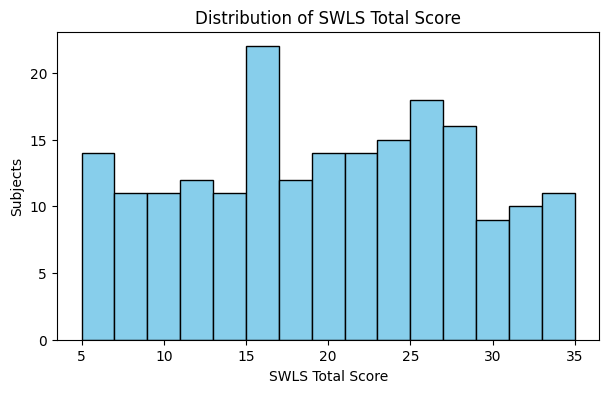

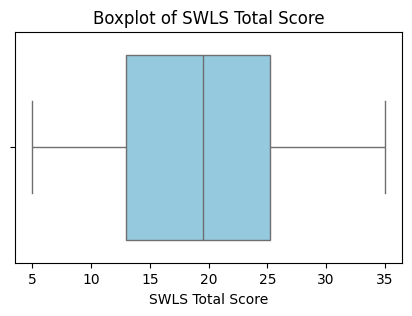

SWLS total score summary statistics:
count    200.000000
mean      19.373568
std        8.329036
min        5.000000
25%       13.000000
50%       19.500000
75%       25.250000
max       35.000000
Name: swls_total, dtype: float64
Shapiro-Wilk test statistic: 0.9669
P-value: 0.0001
The SWLS total score distribution significantly deviates from normality.


In [55]:
# Compute the total SWLS score
df_simplified['swls_total'] = df_simplified[swls_item_cols].sum(axis=1)

# Visualize histogram of SWLS total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['swls_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("SWLS Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of SWLS Total Score")
plt.show()

# Visualize boxplot of SWLS total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['swls_total'], color='skyblue')
plt.xlabel("SWLS Total Score")
plt.title("Boxplot of SWLS Total Score")
plt.show()

# Summary statistics
print("SWLS total score summary statistics:")
print(df_simplified['swls_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['swls_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The SWLS total score distribution is compatible with normality.")
else:
    print("The SWLS total score distribution significantly deviates from normality.")

# Drop all SWLS item columns from the DataFrame
df_simplified = df_simplified.drop(columns=swls_item_cols)


SWLS total scores range from 5 to 35, with a mean of about 19.4 and an interquartile range from 13 to 25.3, indicating generally moderate levels of life satisfaction in this sample. The histogram and boxplot show a slightly skewed, non-normal distribution, which is confirmed by the Shapiro–Wilk test (statistic = 0.97, p < 0.001); therefore, non-parametric methods or categorical groupings are preferable for analyses involving the SWLS total score.​

For SWLS there are commonly used interpretive bands for the total score (5–35):
- 5–9: Extremely dissatisfied
- 10–14: Dissatisfied
- 15–19: Slightly dissatisfied
- 20–24: Slightly satisfied
- 25–29: Satisfied
- 30–35: Extremely satisfied

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_90936/2422952168.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


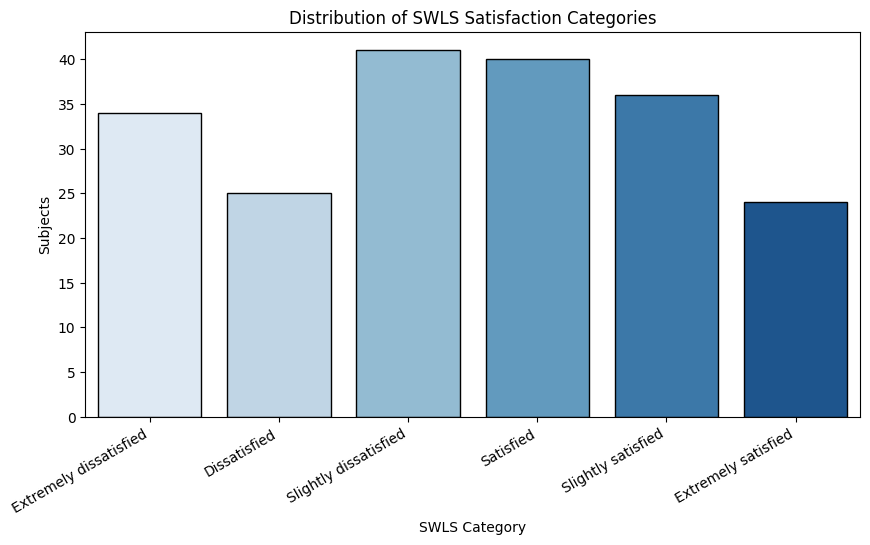

SWLS Category
Slightly dissatisfied     41
Satisfied                 40
Slightly satisfied        36
Extremely dissatisfied    34
Dissatisfied              25
Extremely satisfied       24
Name: count, dtype: int64


In [56]:
# SWLS categories based on total score (5–35)
swls_categories = [
    "Extremely dissatisfied" if s <= 9 else
    "Dissatisfied" if s <= 14 else
    "Slightly dissatisfied" if s <= 19 else
    "Slightly satisfied" if s <= 24 else
    "Satisfied" if s <= 29 else
    "Extremely satisfied"
    for s in df_simplified['swls_total']
]

swls_cat_series = pd.Series(swls_categories, name='SWLS Category')

plt.figure(figsize=(10, 5))
sns.countplot(
    x=swls_cat_series,
    palette=sns.color_palette("Blues", n_colors=6),
    edgecolor='black'
)
plt.xlabel('SWLS Category')
plt.ylabel('Subjects')
plt.title('Distribution of SWLS Satisfaction Categories')
plt.xticks(rotation=30, ha='right')
plt.show()

print(swls_cat_series.value_counts())


#### WHO5

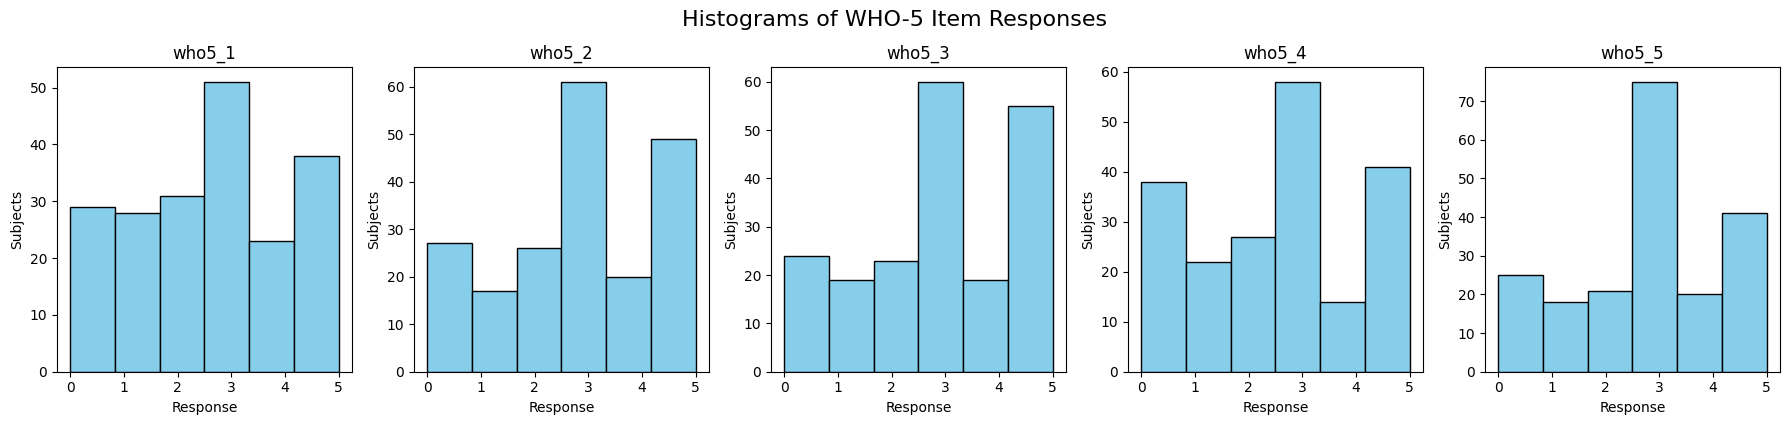

           who5_1     who5_2      who5_3      who5_4      who5_5
count  200.000000  200.00000  200.000000  200.000000  200.000000
mean     2.623116    2.88500    2.979899    2.550505    2.848485
std      1.663582    1.66301    1.668387    1.729140    1.581067
min      0.000000    0.00000    0.000000    0.000000    0.000000
25%      1.000000    2.00000    2.000000    1.000000    2.000000
50%      3.000000    3.00000    3.000000    3.000000    3.000000
75%      4.000000    4.00000    5.000000    4.000000    4.000000
max      5.000000    5.00000    5.000000    5.000000    5.000000
Cronbach_alpha value: 0.6177


In [57]:
# Select only WHO-5 item columns
who5_item_cols = [f"who5_{i}" for i in range(1, 6)]
df_who5 = df_simplified[who5_item_cols]  # or new_df if not simplified

# Plot setup
n_items = len(who5_item_cols)
n_rows, n_cols = 1, 5  # 5 items: 1 row x 5 columns

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4))
axes = axes.flatten()

# Histograms for each WHO-5 item
for idx, col in enumerate(who5_item_cols):
    axes[idx].hist(df_who5[col], bins=6, color='skyblue', edgecolor='black')  # responses 0–5
    axes[idx].set_title(col)
    axes[idx].set_xlabel("Response")
    axes[idx].set_ylabel("Subjects")

plt.tight_layout()
plt.suptitle("Histograms of WHO-5 Item Responses", fontsize=16, y=1.05)
plt.show()

# Descriptive statistics
print(df_who5.describe())

# Cronbach's alpha for WHO-5
c_alpha_who5 = cronbach_alpha(df_who5)
print(f"Cronbach_alpha value: {c_alpha_who5:.4f}")

WHO‑5 item scores cluster around the middle of the 0–5 scale, with medians of 2–3 and means between about 2.6 and 3.0. This indicates moderate levels of positive well‑being, with some participants reporting very low or very high scores. The Cronbach’s alpha of 0.62 reflects moderate internal consistency, which is lower than typical WHO‑5 reports but still suggests that the items measure a common construct, so the total score can be used cautiously as an index of well‑being.​

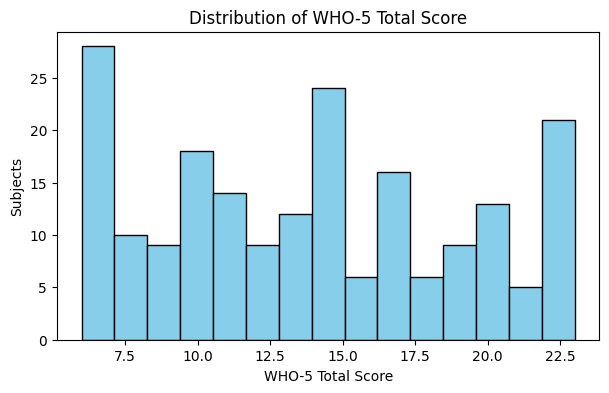

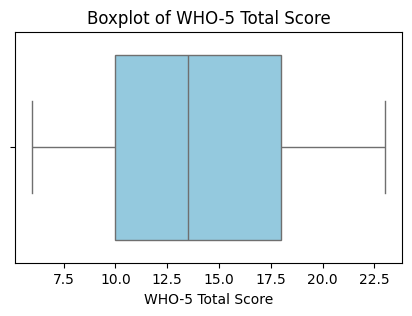

WHO-5 total score summary statistics:
count    200.000000
mean      13.887005
std        5.224884
min        6.000000
25%       10.000000
50%       13.500000
75%       18.000000
max       23.000000
Name: who5_total, dtype: float64
Shapiro-Wilk test statistic: 0.9464
P-value: 0.0000
The WHO-5 total score distribution significantly deviates from normality.


In [58]:
# Compute the total WHO-5 score
df_simplified['who5_total'] = df_simplified[who5_item_cols].sum(axis=1)

# Visualize histogram of WHO-5 total score
plt.figure(figsize=(7, 4))
plt.hist(df_simplified['who5_total'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("WHO-5 Total Score")
plt.ylabel("Subjects")
plt.title("Distribution of WHO-5 Total Score")
plt.show()

# Visualize boxplot of WHO-5 total score
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_simplified['who5_total'], color='skyblue')
plt.xlabel("WHO-5 Total Score")
plt.title("Boxplot of WHO-5 Total Score")
plt.show()

# Summary statistics
print("WHO-5 total score summary statistics:")
print(df_simplified['who5_total'].describe())

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df_simplified['who5_total'])
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The WHO-5 total score distribution is compatible with normality.")
else:
    print("The WHO-5 total score distribution significantly deviates from normality.")

# Drop all WHO-5 item columns from the DataFrame
df_simplified = df_simplified.drop(columns=who5_item_cols)


WHO‑5 total scores in your sample range from 6 to 23, with a mean of about 13.9 and an interquartile range from 10 to 18, indicating overall moderate well‑being. The histogram and boxplot show a slightly skewed, non‑normal distribution, which the Shapiro–Wilk test confirms (statistic = 0.95, p < 0.001). Because the distribution significantly deviates from normality, non‑parametric methods and the recommended WHO‑5 cut‑off (<13 vs ≥13) are more appropriate than parametric tests that assume normality.

For the WHO‑5, standard interpretation uses the total raw score (0–25) or the percentage score (0–100) rather than multiple qualitative bands. The core cut-off from the WHO‑5 manual is:
- Raw total < 13 (or percentage < 52): “Possible depression / poor well‑being”, follow‑up recommended.
- Raw total ≥ 13 (percentage ≥ 52): “No indication of depression / acceptable well‑being.”

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_90936/1799557976.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


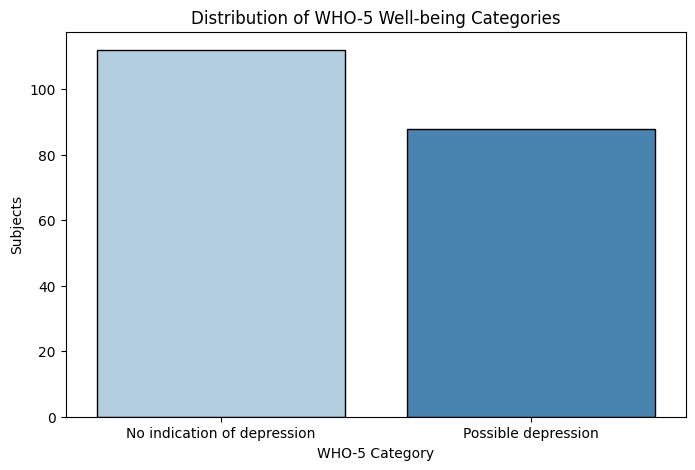

WHO-5 Category
No indication of depression    112
Possible depression             88
Name: count, dtype: int64


In [59]:
# WHO-5 categories based on total score (0–25)
who5_categories = [
    "Possible depression" if s < 13 else
    "No indication of depression"
    for s in df_simplified['who5_total']
]

who5_cat_series = pd.Series(who5_categories, name='WHO-5 Category')

plt.figure(figsize=(8, 5))
sns.countplot(
    x=who5_cat_series,
    palette=sns.color_palette("Blues", n_colors=2),
    edgecolor='black'
)
plt.xlabel('WHO-5 Category')
plt.ylabel('Subjects')
plt.title('Distribution of WHO-5 Well-being Categories')
plt.show()

print(who5_cat_series.value_counts())


In [60]:
df_simplified

,age,gender,education,marital,income,gender_label,school_labels,marital_labels,iat_total,audit_total,dast_total,pgsi_total,pcl5_total,mspss_total,swls_total,who5_total
0,39.0,0,8.0,1.0,14000,Male,Middle,Married,39.000000,25.0,0.0,24.0,0.0,51.0,8.0,13.0
1,18.0,1,5.0,1.0,25000,Female,Elementary,Married,33.000000,16.0,0.0,8.0,6.0,43.0,14.0,7.0
2,40.0,0,13.0,2.0,56000,Male,High,Divorced,60.000000,0.0,7.0,0.0,50.0,18.0,8.0,13.0
3,24.0,1,22.0,0.0,35000,Female,Master,Single,56.000000,7.0,8.0,0.0,63.0,26.0,15.0,11.0
4,19.0,1,22.0,1.0,42000,Female,Master,Married,0.000000,14.0,4.0,1.0,8.0,61.0,27.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,Male,High,Married,66.000000,5.0,10.0,0.0,77.0,15.0,9.0,10.0
196,21.0,0,18.0,1.0,38000,Male,Bachelor,Married,68.000000,5.0,8.0,0.0,69.0,35.0,19.0,11.0
197,20.0,1,22.0,4.0,50000,Female,Master,Separated,11.000000,13.0,4.0,3.0,0.0,63.0,29.0,21.0
198,39.0,0,8.0,1.0,22000,Male,Middle,Married,46.000000,15.0,0.0,23.0,8.0,48.0,13.0,6.0


The current working dataset now contains 200 participants and 16 variables: age, gender, education, marital status, income, their corresponding label columns, and the total scores for all psychometric scales (IAT, AUDIT, DAST‑10, PGSI, PCL‑5, MSPSS, SWLS, WHO‑5). This structure is appropriate for moving on to bivariate and multivariate analyses, since all item-level columns have been collapsed into reliable total scores and the key sociodemographic variables are preserved in both numeric and labeled form.

# Bivariate EDA
- Correlations between continuous scales (Spearman if non‑normal) and between each scale and age/income.
- Boxplots or violin plots of key scores by gender, income groups, or other relevant categories.

## Spearman correlation test

The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. Although calculation of the p-value does not make strong assumptions about the distributions underlying the samples, it is only accurate for very large samples (>500 observations).
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

           var       rho             p    n
0   pcl5_total  0.177373  1.198251e-02  200
3   pgsi_total  0.005296  9.406715e-01  200
2   dast_total -0.002590  9.709631e-01  200
6          age -0.019554  7.834507e-01  200
4   who5_total -0.273688  8.803000e-05  200
5   swls_total -0.283011  4.894189e-05  200
7       income -0.578639  2.865560e-19  200
1  audit_total -0.663856  8.804521e-27  200


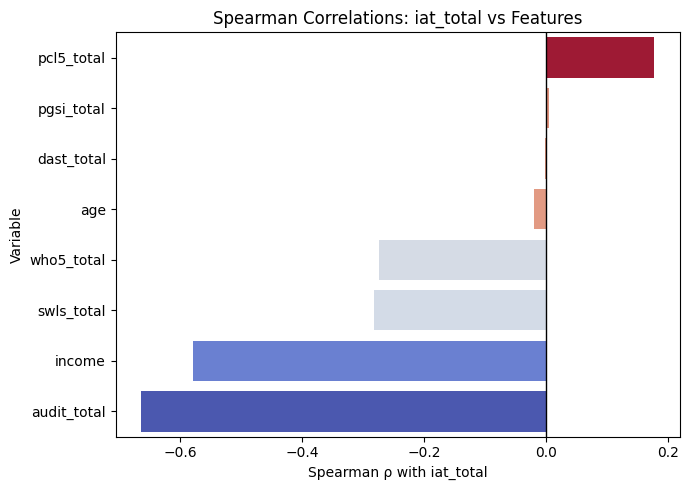

In [61]:
target = "iat_total"
features = [
    "pcl5_total", "audit_total", "dast_total", "pgsi_total",
    "who5_total", "swls_total", "age", "income"
]

rows = []
for var in features:
    valid = df_simplified[[target, var]]
    rho, p = spearmanr(valid[target], valid[var])
    rows.append({"var": var, "rho": rho, "p": p, "n": len(valid)})

spearman_iat = pd.DataFrame(rows).sort_values("rho", ascending=False)
print(spearman_iat)

plt.figure(figsize=(7, 5))
sns.barplot(
    data=spearman_iat,
    x="rho", y="var",
    palette="coolwarm",
    hue="rho", dodge=False, legend=False
)
plt.axvline(0, color="black", linewidth=1)
plt.xlabel("Spearman ρ with iat_total")
plt.ylabel("Variable")
plt.title("Spearman Correlations: iat_total vs Features")
plt.tight_layout()
plt.show()

Strongest links: **audit_total (ρ ≈ −0.66) and income (ρ ≈ −0.58)**: higher IAT with higher alcohol problems and lower income (assuming higher code = higher income).

Moderate: **swls_total and who5_total (ρ ≈ −0.28)**: higher IAT with lower life satisfaction and well‑being.

Weak/none: pcl5_total small positive; pgsi_total, dast_total, age near zero.

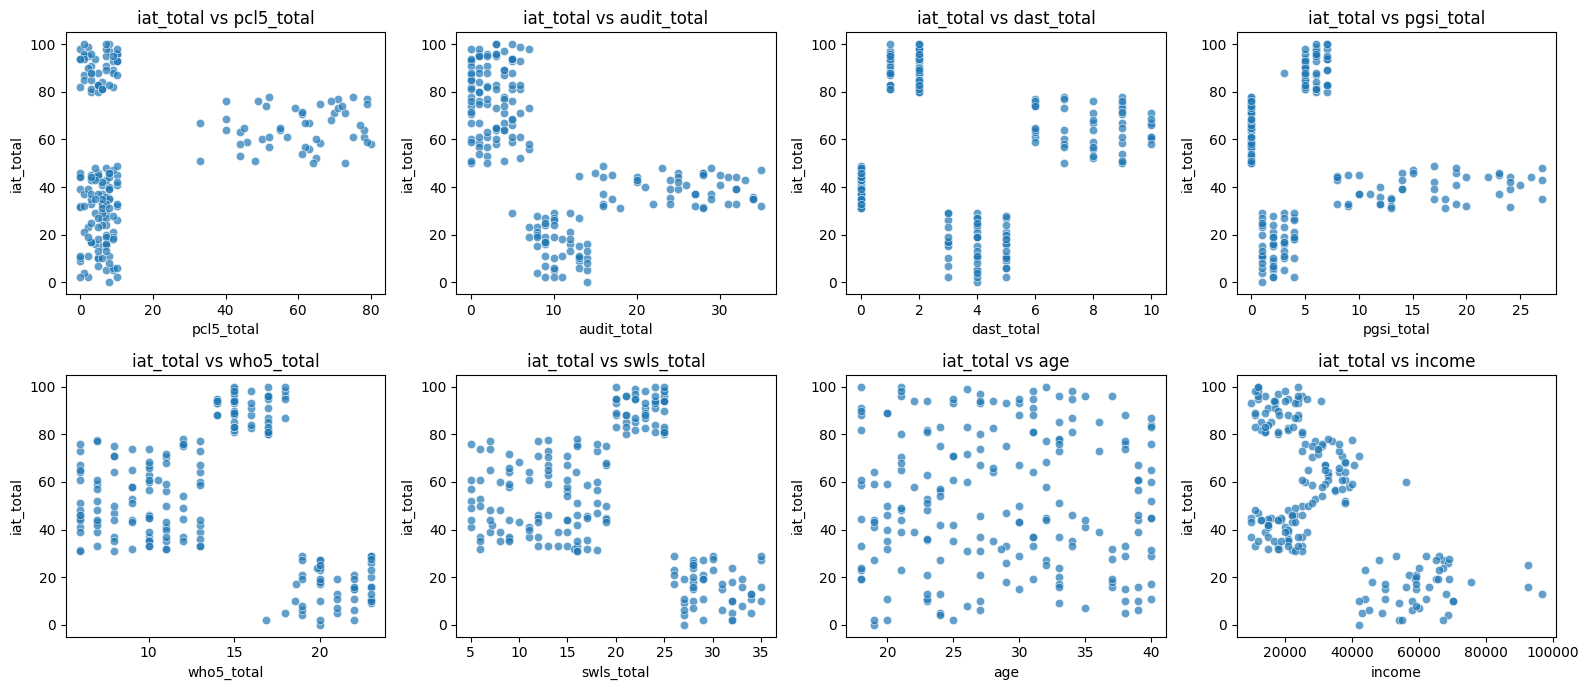

In [62]:
n_features = len(features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols  # ceil

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3.5*n_rows))
axes = axes.flatten()  # make it 1D for easy indexing

for i, var in enumerate(features):
    ax = axes[i]
    sns.scatterplot(
        data=df_simplified,
        x=var,
        y=target,
        ax=ax,
        alpha=0.7
    )
    ax.set_title(f"{target} vs {var}")
    ax.set_xlabel(var)
    ax.set_ylabel(target)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- audit_total and income: clear negative monotonic trends → matches strong negative ρ.
- who5_total and swls_total: visible downward pattern → consistent with moderate negative ρ.
- pcl5_total: weak upward tendency → small positive ρ.
- dast_total, pgsi_total, age: mostly clouds with no clear slope → ρ near 0 makes sense.

## Kruskal-Wallis test

In contrast, the **Kruskal-Wallis test** was used to compare IAT scores across categorical groups (e.g., gender categories). It is a nonparametric alternative to one-way ANOVA for assessing whether the medians differ between three or more independent groups when data are not normally distributed.

The Kruskal-Wallis test is essentially **an extension of the Mann-Whitney U test**, which is used for comparing exactly two independent groups on a continuous or ordinal variable under non-normality assumptions. Therefore, the Mann-Whitney U test is applied when comparing two groups, while Kruskal-Wallis is appropriate for three or more groups.

Thus, the choice of test depends on whether the aim is to assess association between variables (Spearman), or differences between two groups (Mann-Whitney U), or differences among three or more groups (Kruskal-Wallis) under non-normal data conditions.

https://www.slideshare.net/slideshow/kruskal-wallis-test-friedman-test-spearman-correlation/197229012

Kruskal–Wallis ranks all 200 IAT scores from lowest to highest, then checks if the average rank differs across gender groups.
H is the test statistic measuring how different the average ranks are.
p < 0.05 tells that at least one group has a different rank pattern than the others. 
ε² tells you how much a category explains IAT variation in %.
Kruskal–Wallis only says "at least one group differs," not which ones.
For this reason, post-hoc tests checked all possible pairs to test which ones are significant.

In [63]:
import itertools
from scipy.stats import kruskal, mannwhitneyu

def holm_bonferroni(pvals):
    m = len(pvals)
    order = np.argsort(pvals)
    p_sorted = np.array(pvals)[order]
    adj = np.empty(m, dtype=float)
    running_max = 0.0
    for i, p in enumerate(p_sorted):
        val = (m - i) * p
        running_max = max(running_max, val)
        adj[i] = min(1.0, running_max)
    p_adj = np.empty(m, dtype=float)
    p_adj[order] = adj
    return p_adj

def rank_biserial_from_U(U, n1, n2):
    return 1 - (2 * U) / (n1 * n2)

def hodges_lehmann(a, b):
    return float(np.median(np.subtract.outer(b, a).ravel()))

def kruskal_by_group(df, score_col, group_col):
    # Drop missing
    df_ = df[[score_col, group_col]]

    # Descriptives
    desc = df_.groupby(group_col)[score_col].agg(
        count="count", median="median", mean="mean", std="std"
    )
    print(f"\n=== {score_col} by {group_col} ===")
    print(desc.round(2))

    groups = [g[score_col].values for _, g in df_.groupby(group_col)]
    labels = df_[group_col].unique().tolist()
    k = len(groups)

    if k < 2:
        print("\nNot enough groups for a test.")
        return

    if k == 2:
        # Mann–Whitney case
        A, B = groups
        la, lb = labels
        U, p = mannwhitneyu(A, B, alternative="two-sided", method="auto")
        r_rb = rank_biserial_from_U(U, len(A), len(B))
        print(f"\n--- Mann–Whitney U ({la} vs {lb}) ---")
        print(f"U = {U:.2f}, p = {p:.4f}, rank-biserial r = {r_rb:.3f}")
        return

    # Kruskal–Wallis
    H, p_kw = kruskal(*groups)
    n_tot = sum(len(g) for g in groups)
    eps2 = (H - k + 1) / (n_tot - k) if (n_tot - k) > 0 else np.nan

    print(f"\n--- Kruskal–Wallis (k={k} groups) ---")
    print(f"H = {H:.3f}, df = {k - 1}, p = {p_kw:.4f}")
    print(f"Effect size: epsilon-squared ε² = {eps2:.3f}")

    # Post-hoc pairwise Mann–Whitney + Holm
    pairs = []
    for gA, gB in itertools.combinations(desc.index, 2):
        A = df_.loc[df_[group_col] == gA, score_col].values
        B = df_.loc[df_[group_col] == gB, score_col].values
        U, p_raw = mannwhitneyu(A, B, alternative="two-sided", method="auto")
        r_rb = rank_biserial_from_U(U, len(A), len(B))
        hl = hodges_lehmann(A, B)
        pairs.append({
            "Group_A": gA, "Group_B": gB,
            "n_A": len(A), "n_B": len(B),
            "U": float(U), "p_raw": float(p_raw),
            "r_rank_biserial": float(r_rb),
            "HL_diff(B-A)": float(hl)
        })

    pairs_df = pd.DataFrame(pairs)
    pairs_df["p_holm"] = holm_bonferroni(pairs_df["p_raw"].values)
    pairs_df = pairs_df.sort_values("p_holm").reset_index(drop=True)

    print("\nPost-hoc pairwise Mann–Whitney (Holm-corrected):")
    print(pairs_df.round(4).to_string(index=False))

    sig = pairs_df[pairs_df["p_holm"] < 0.05]
    if not sig.empty:
        print("\nSignificant pairs (p < 0.05 after Holm):")
        for _, r in sig.iterrows():
            direction = "B > A" if r["r_rank_biserial"] > 0 else "A > B"
            print(f" - {r['Group_A']} vs {r['Group_B']}: {direction}, "
                  f"HL = {r['HL_diff(B-A)']:.2f}, p = {r['p_holm']:.4f}")
    else:
        print("\nNo significant pairs after Holm correction.")



In [64]:
kruskal_by_group(df_simplified, "iat_total", "gender_label")


=== iat_total by gender_label ===
                   count  median   mean    std
gender_label                                  
Female                85    61.0  58.83  28.68
Male                  83    44.0  48.77  28.93
Non-binary            20    42.5  39.45  22.38
Prefer not to say     12    66.0  56.50  30.05

--- Kruskal–Wallis (k=4 groups) ---
H = 9.724, df = 3, p = 0.0211
Effect size: epsilon-squared ε² = 0.034

Post-hoc pairwise Mann–Whitney (Holm-corrected):
   Group_A           Group_B  n_A  n_B      U  p_raw  r_rank_biserial  HL_diff(B-A)  p_holm
    Female        Non-binary   85   20 1195.0 0.0049          -0.4059         -21.0  0.0296
    Female              Male   85   83 4246.5 0.0226          -0.2038         -11.0  0.1131
Non-binary Prefer not to say   20   12   83.0 0.1553           0.3083          23.0  0.6211
    Female Prefer not to say   85   12  541.0 0.7382          -0.0608          -3.0  0.9816
      Male        Non-binary   83   20  948.0 0.3272          -0.1

IAT scores differed significantly by gender (Kruskal–Wallis H(3) = 9.72, p = .021, ε²=0.03), with post-hoc tests showing that female participants reported higher scores than non-binary participants (adjusted p = .030).
Only Female vs Non-binary remained significant, all other pairs (Female vs Male, Male vs Non-binary, etc.) were not significant after correction.

In [65]:
kruskal_by_group(df_simplified, "iat_total", "school_labels")


=== iat_total by school_labels ===
               count  median   mean    std
school_labels                             
Bachelor          35    54.0  53.29  26.51
Doctoral           8    20.0  20.71   6.20
Elementary        34    41.0  49.62  22.77
High              52    63.5  58.68  27.91
Master            26    16.5  21.91  21.13
Middle            45    81.0  70.58  23.22

--- Kruskal–Wallis (k=6 groups) ---
H = 60.987, df = 5, p = 0.0000
Effect size: epsilon-squared ε² = 0.289

Post-hoc pairwise Mann–Whitney (Holm-corrected):
   Group_A    Group_B  n_A  n_B      U  p_raw  r_rank_biserial  HL_diff(B-A)  p_holm
    Master     Middle   26   45   72.0 0.0000           0.8769       54.2663  0.0000
Elementary     Master   34   26  776.0 0.0000          -0.7557      -25.0000  0.0000
      High     Master   52   26 1103.5 0.0000          -0.6324      -44.0000  0.0001
  Bachelor     Master   35   26  762.0 0.0000          -0.6747      -34.0000  0.0001
  Doctoral     Middle    8   45    0.

IAT scores differed strongly by education (Kruskal–Wallis H(5) = 60.99, p < .001, ε² = .29, large effect). Participants with Middle and High education reported much higher IAT scores than those with Master or Doctoral degrees, with median differences often exceeding 40–50 points.

In [66]:
kruskal_by_group(df_simplified, "iat_total", "marital_labels")


=== iat_total by marital_labels ===
                   count  median   mean    std
marital_labels                                
Divorced              21    39.0  50.17  31.96
Married               81    45.0  46.09  25.15
Prefer not to say     21    52.0  51.08  31.64
Separated             10    20.0  19.30   8.90
Single                51    82.0  75.76  21.16
Widowed               16    38.0  37.44  19.04

--- Kruskal–Wallis (k=6 groups) ---
H = 54.705, df = 5, p = 0.0000
Effect size: epsilon-squared ε² = 0.256

Post-hoc pairwise Mann–Whitney (Holm-corrected):
          Group_A           Group_B  n_A  n_B     U  p_raw  r_rank_biserial  HL_diff(B-A)  p_holm
          Married            Single   81   51 778.5 0.0000           0.6231       31.0000  0.0000
        Separated            Single   10   51   0.0 0.0000           1.0000       62.0000  0.0000
           Single           Widowed   51   16 724.0 0.0000          -0.7745      -40.0000  0.0000
          Married         Separated  

IAT scores differed strongly by marital status (Kruskal–Wallis H(5) = 54.71, p < .001, ε² = .26, large effect). Single participants reported much higher IAT scores (median = 82) than all other marital groups, with median differences ranging from 24 to 62 points.

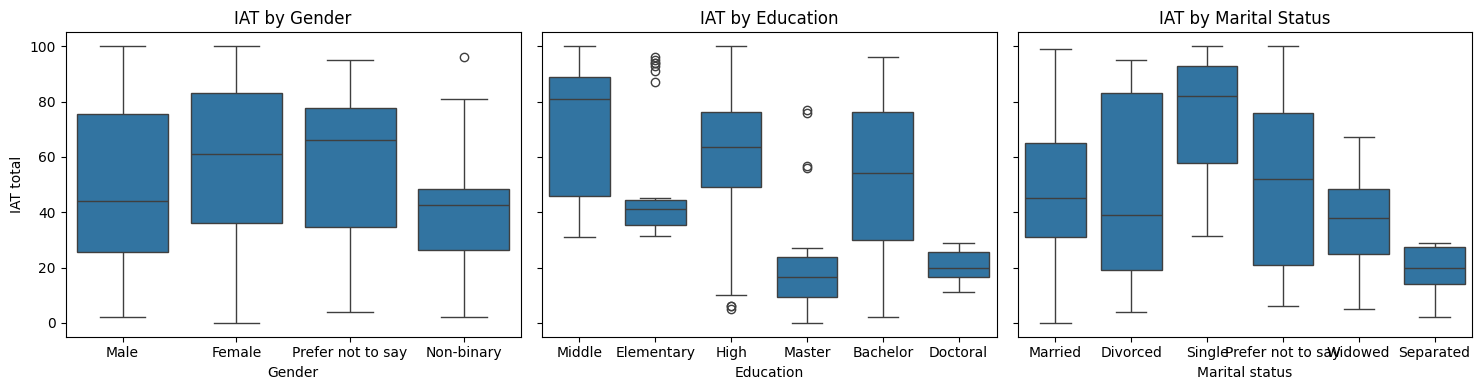

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

# 1. IAT by gender
sns.boxplot(x="gender_label", y="iat_total",
            data=df_simplified, ax=axes[0])
axes[0].set_title("IAT by Gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("IAT total")

# 2. IAT by education
sns.boxplot(x="school_labels", y="iat_total",
            data=df_simplified, ax=axes[1])
axes[1].set_title("IAT by Education")
axes[1].set_xlabel("Education")
axes[1].set_ylabel("")

# 3. IAT by marital status
sns.boxplot(x="marital_labels", y="iat_total",
            data=df_simplified, ax=axes[2])
axes[2].set_title("IAT by Marital Status")
axes[2].set_xlabel("Marital status")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()

- Gender: Females and “Prefer not to say” show higher medians and upper‑quartile IAT scores than males and non‑binary participants, matching the significant H and p you found.
- Education: Very strong gradient; “Middle” and “High” education groups cluster at much higher IAT, while “Master” and “Doctoral” are clearly lower, with compressed boxes near the bottom range.
- Marital status: Singles stand out with a much higher median and wide spread, while separated and widowed groups show lower medians; married and divorced sit in the middle, exactly as your numeric summary indicated.

Education and marital status as main sociodemographic axes for personas. 

Gender as a secondary/background descriptor.

# Multivariate EDA
A correlation heatmap for all composite scores to show how dimensions (addictions, PTSD, well‑being, social support) relate.​
Multivariate EDA includes also dimensionality reduction (PCA, FAMD) to reduce many correlated features to 2-4 interpretable components. 

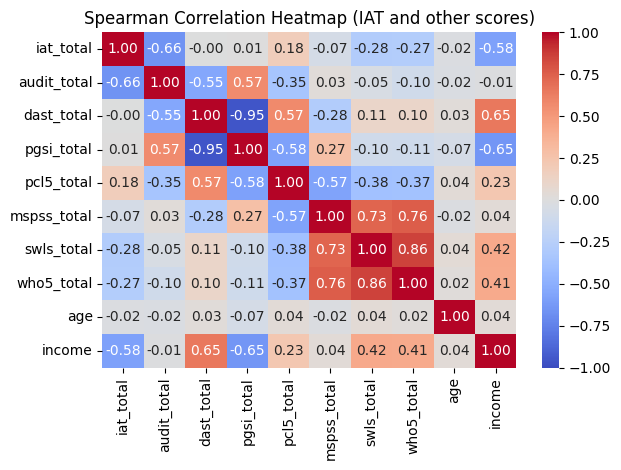

In [68]:
corr = df_simplified[[
    "iat_total","audit_total","dast_total","pgsi_total",
    "pcl5_total","mspss_total","swls_total","who5_total",
    "age","income"
]].corr(method="spearman")

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm",
            vmin=-1, vmax=1, center=0)
plt.title("Spearman Correlation Heatmap (IAT and other scores)")
plt.tight_layout()
plt.show()


This figure nicely motivates which variables to use as main axes for personas (IAT + alcohol + income + well‑being + life satisfaction, with weaker roles for age, drugs, gambling).

## ONE-HOT ENCODING + PCA

In [69]:
features_num = [
    "iat_total", "audit_total", "who5_total",
    "swls_total", "pcl5_total", "mspss_total",
    "income", "age"
]

features_cat = ["gender_label", "school_labels", "marital_labels"]

df_mix = df_simplified[features_num + features_cat].dropna()


In [70]:
# One-hot encode categoricals
df_dummies = pd.get_dummies(df_mix[features_cat], drop_first=False)

# Standardize numeric
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df_mix[features_num])

# Combine
X_pca_input = np.hstack([X_num_scaled, df_dummies.values])

# PCA with 3 components
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_pca_input)
print("PCA explained variance ratio:", pca.explained_variance_ratio_)

# Attach PCs to dataframe
df_pca_comp = df_mix.copy()
df_pca_comp[["PC1_pca", "PC2_pca", "PC3_pca"]] = X_pca

# Create IAT levels
bins = [0, 39, 69, 100]
labels = ["Average", "Problematic", "Severe"]
df_pca_comp["iat_level"] = pd.cut(df_pca_comp["iat_total"], bins=bins, labels=labels)

PCA explained variance ratio: [0.33940544 0.17200717 0.15687975]


## FAMD (leaving mixed data)

In [71]:
famd = prince.FAMD(
    n_components=3,
    n_iter=10,
    copy=True,
    check_input=True,
    engine="sklearn",    
    random_state=42
)

famd = famd.fit(df_mix)
X_famd = famd.transform(df_mix)

df_famd_comp = df_mix.copy()
df_famd_comp[["PC1_famd", "PC2_famd", "PC3_famd"]] = X_famd.values
df_famd_comp["iat_level"] = pd.cut(df_famd_comp["iat_total"], bins=bins, labels=labels)


## Comparison before clustering

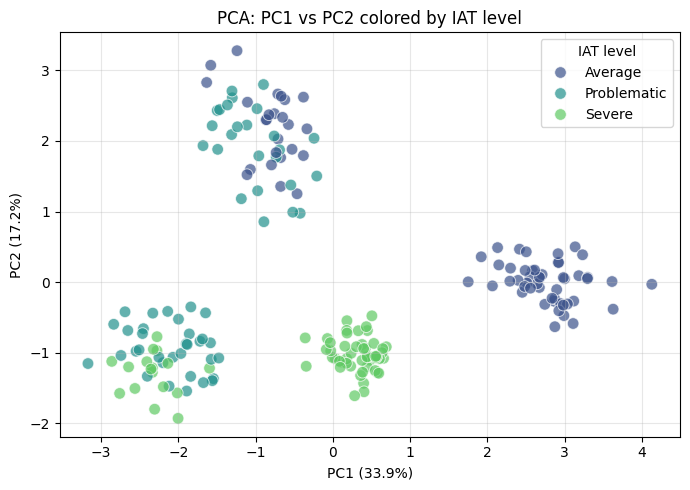

In [72]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df_pca_comp,
    x="PC1_pca", y="PC2_pca",
    hue="iat_level", palette="viridis", alpha=0.7, s=70
)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("PCA: PC1 vs PC2 colored by IAT level")
plt.legend(title="IAT level")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


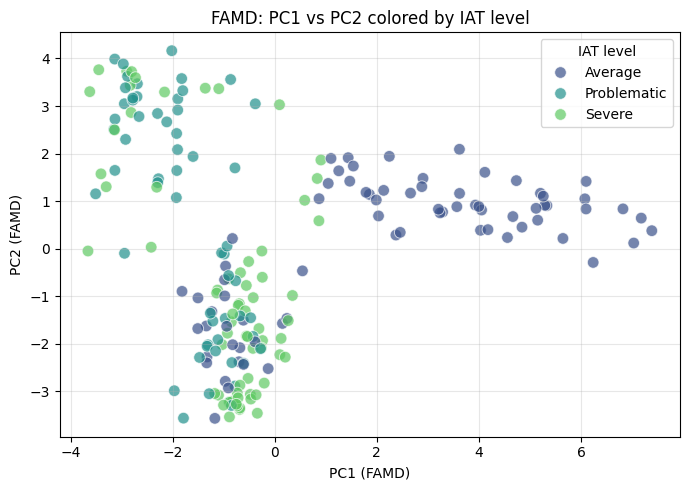

In [73]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df_famd_comp,
    x="PC1_famd", y="PC2_famd",
    hue="iat_level", palette="viridis", alpha=0.7, s=70
)
plt.xlabel("PC1 (FAMD)")
plt.ylabel("PC2 (FAMD)")
plt.title("FAMD: PC1 vs PC2 colored by IAT level")
plt.legend(title="IAT level")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


PCA plot:
- IAT levels form very clear, compact groups.
- “Average”, “Problematic”, “Severe” are almost linearly separated.
Great structure for clustering/personas.

FAMD plot:
- IAT levels are much more mixed.
- PC1/PC2 seem driven more by categorical variables; IAT is not as clearly separated.

# Clustering 
Kmeans
https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def kmeans_diagnostics(X, max_clusters=10, nrefs=5, random_state=42):
    """
    Compute Elbow (WCSS), Silhouette, and Gap Statistic for k-means on X.
    
    Params:
        X           : ndarray (n_samples, n_features) – e.g., PCA or FAMD components
        max_clusters: maximum k to try (>= 2)
        nrefs       : number of reference datasets for Gap Statistic
    Returns:
        results     : dict with:
            - 'K'              : list of k values
            - 'inertia'        : list of WCSS (Elbow)
            - 'silhouette'     : list of silhouette scores
            - 'gap_df'         : DataFrame with gap and gap_std per k
            - 'optimal_k_gap'  : k chosen by Gap (1-SE rule)
            - 'optimal_k_silh' : k with max silhouette
    """
    K = range(2, max_clusters + 1)
    inertias = []
    silhouettes = []

    # 1) Elbow + Silhouette
    for k in K:
        km = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        labels = km.fit_predict(X)
        inertias.append(km.inertia_)
        silhouettes.append(silhouette_score(X, labels))

    # 2) Gap Statistic
    gaps = np.zeros(max_clusters - 1)
    s_k = np.zeros(max_clusters - 1)
    gap_results = []

    for idx, k in enumerate(range(1, max_clusters)):
        ref_disps = np.zeros(nrefs)

        # Reference datasets
        for i in range(nrefs):
            random_ref = np.random.uniform(
                low=X.min(axis=0),
                high=X.max(axis=0),
                size=X.shape
            )
            km_ref = KMeans(n_clusters=k, random_state=random_state, n_init=10)
            km_ref.fit(random_ref)
            ref_disps[i] = np.log(km_ref.inertia_)

        # Original data
        km_orig = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        km_orig.fit(X)
        orig_disp = np.log(km_orig.inertia_)

        gap = np.mean(ref_disps) - orig_disp
        sd_k = np.sqrt(np.mean((ref_disps - np.mean(ref_disps))**2))
        s_k[idx] = sd_k * np.sqrt(1 + 1/nrefs)
        gaps[idx] = gap

        gap_results.append({"clusterCount": k, "gap": gap, "gap_std": s_k[idx]})

    gap_df = pd.DataFrame(gap_results)

    # Gap 1-SE rule
    optimal_k_gap = gaps.argmax() + 1  # simple: k where gap is max
    # (for strict 1-SE rule, you could implement the full condition)

    # Best silhouette
    optimal_k_silh = list(K)[silhouettes.index(max(silhouettes))]

    # 3) Plot Elbow + Silhouette
    plt.figure(figsize=(12, 5))

    # Elbow
    plt.subplot(1, 2, 1)
    plt.plot(list(K), inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('WCSS (Inertia)')
    plt.title('Elbow Method')

    # Silhouette
    plt.subplot(1, 2, 2)
    plt.plot(list(K), silhouettes, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method')

    plt.tight_layout()
    plt.show()

    # 4) Plot Gap Statistic
    plt.figure(figsize=(8, 5))
    plt.errorbar(gap_df["clusterCount"], gap_df["gap"],
                 yerr=gap_df["gap_std"], marker='o', capsize=5)
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Gap Statistic')
    plt.title('Gap Statistic vs k')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    results = {
        "K": list(K),
        "inertia": inertias,
        "silhouette": silhouettes,
        "gap_df": gap_df,
        "optimal_k_gap": optimal_k_gap,
        "optimal_k_silh": optimal_k_silh
    }
    return results


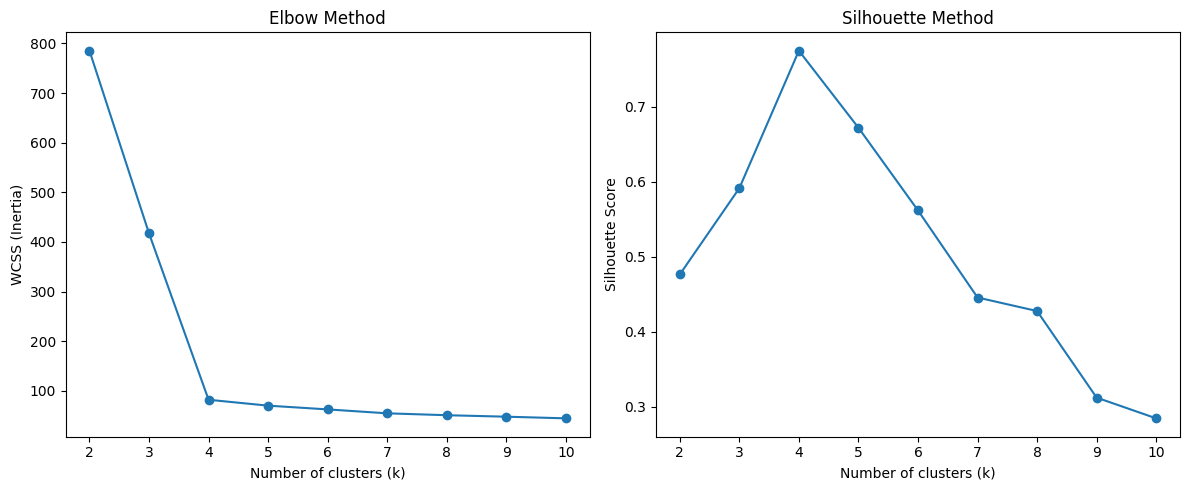

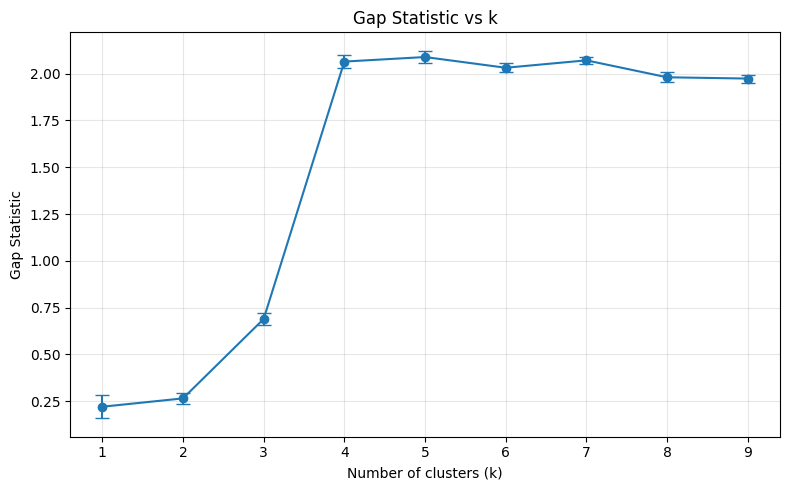

OPTIMAL NUMBER OF CLUSTERS FOR PCA
Silhouette method: k = 4
Elbow method: Inspect the elbow plot visually
  (Automated suggestion based on largest drop: k = 8)
Gap Statistic method: k = 5
RECOMMENDED k: 5 (or use your judgment)

Final clustering performed with k = 5
Cluster sizes:
cluster_pca
0    50
1    23
2    50
3    50
4    27
Name: count, dtype: int64


In [76]:
X_pca_cluster = df_pca_comp[["PC1_pca", "PC2_pca", "PC3_pca"]].values

# After running kmeans_diagnostics on PCA:
results_pca = kmeans_diagnostics(X_pca_cluster, max_clusters=10, nrefs=5)

# Print optimal k from each method
print("=" * 50)
print("OPTIMAL NUMBER OF CLUSTERS FOR PCA")
print("=" * 50)

# 1. Silhouette
optimal_k_silh = results_pca["optimal_k_silh"]
print(f"Silhouette method: k = {optimal_k_silh}")

# 2. Elbow (manual inspection, but you can suggest based on derivative)
print(f"Elbow method: Inspect the elbow plot visually")
# Optional: automated elbow detection (basic version)
inertias = results_pca["inertia"]
diffs = np.diff(inertias)
elbow_k = np.argmax(diffs) + 2  # +2 because K starts at 2 and diff reduces length by 1
print(f"  (Automated suggestion based on largest drop: k = {elbow_k})")

# 3. Gap Statistic
optimal_k_gap = results_pca["optimal_k_gap"]
print(f"Gap Statistic method: k = {optimal_k_gap}")

print("=" * 50)
print(f"RECOMMENDED k: {optimal_k_gap} (or use your judgment)")
print("=" * 50)

# Now fit final k-means with chosen k
k_pca_final = optimal_k_gap  # or optimal_k_silh, or manual choice
kmeans_pca_final = KMeans(n_clusters=k_pca_final, random_state=42, n_init=10)
df_pca_comp["cluster_pca"] = kmeans_pca_final.fit_predict(X_pca_cluster)

print(f"\nFinal clustering performed with k = {k_pca_final}")
print(f"Cluster sizes:\n{df_pca_comp['cluster_pca'].value_counts().sort_index()}")


In [77]:
def summarize_clusters(df, label_col):
    print("\nNumeric means by cluster:")
    print(df.groupby(label_col)[[
        "iat_total", "audit_total", "who5_total", "swls_total",
        "pcl5_total", "mspss_total", "income", "age"
    ]].mean().round(1))

    print("\nMost frequent categories by cluster:")
    print(df.groupby(label_col)[[
        "gender_label", "school_labels", "marital_labels"
    ]].agg(lambda x: x.value_counts().index[0]))


# k=4
k4 = 4
kmeans4 = KMeans(n_clusters=k4, random_state=42, n_init=10)
df_pca_comp["cluster_k4"] = kmeans4.fit_predict(X_pca_cluster)
print("=== k = 4 ===")
summarize_clusters(df_pca_comp, "cluster_k4")

# k=5 (you already have cluster_pca)
print("\n=== k = 5 ===")
summarize_clusters(df_pca_comp, "cluster_pca")


=== k = 4 ===

Numeric means by cluster:
            iat_total  audit_total  who5_total  swls_total  pcl5_total  \
cluster_k4                                                               
0                64.8          2.8         9.5        12.4        60.3   
1                15.6         10.5        20.9        30.0         5.6   
2                90.2          2.6        15.9        22.9         5.2   
3                39.6         25.4         9.3        12.2         5.4   

            mspss_total   income   age  
cluster_k4                              
0                  25.0  33388.0  29.0  
1                  70.3  60556.0  29.2  
2                  70.1  17892.0  28.0  
3                  48.7  18552.0  28.3  

Most frequent categories by cluster:
           gender_label school_labels marital_labels
cluster_k4                                          
0                Female          High        Married
1                  Male        Master        Married
2                F

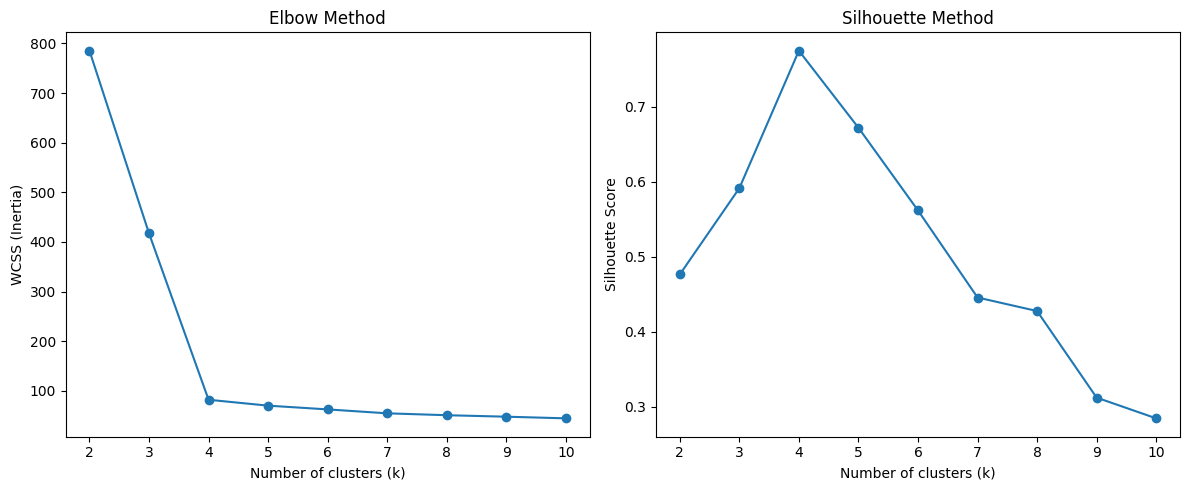

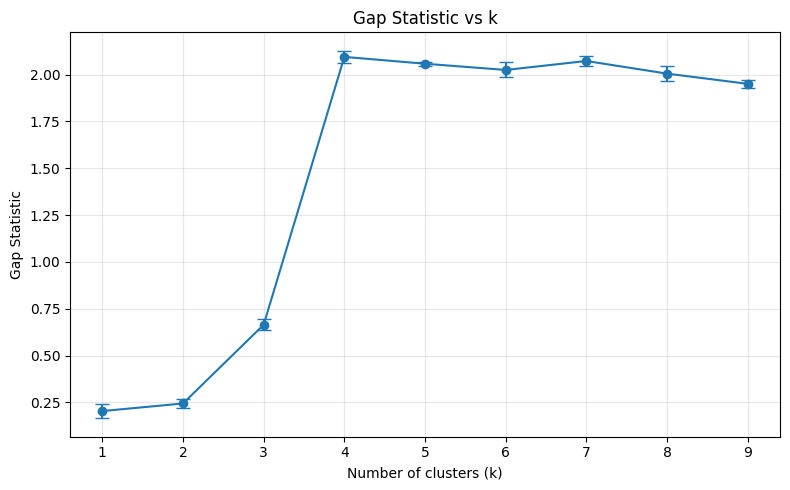

PCA – Best k by Silhouette: 4
PCA – Best k by Gap: 4
   clusterCount       gap   gap_std
0             1  0.204220  0.038786
1             2  0.244749  0.022933
2             3  0.664724  0.029531
3             4  2.094675  0.032895
4             5  2.058109  0.009606
5             6  2.024882  0.040238
6             7  2.072716  0.025080
7             8  2.005310  0.041164
8             9  1.950723  0.022112


In [75]:
X_pca_cluster = df_pca_comp[["PC1_pca", "PC2_pca", "PC3_pca"]].values

results_pca = kmeans_diagnostics(X_pca_cluster, max_clusters=10, nrefs=5)

print("PCA – Best k by Silhouette:", results_pca["optimal_k_silh"])
print("PCA – Best k by Gap:", results_pca["optimal_k_gap"])
print(results_pca["gap_df"])


In [76]:
k_pca_final = results_pca["optimal_k_gap"]  # or optimal_k_silh, or your judgement
kmeans_pca_final = KMeans(n_clusters=k_pca_final, random_state=42, n_init=10)
df_pca_comp["cluster_pca"] = kmeans_pca_final.fit_predict(X_pca_cluster)

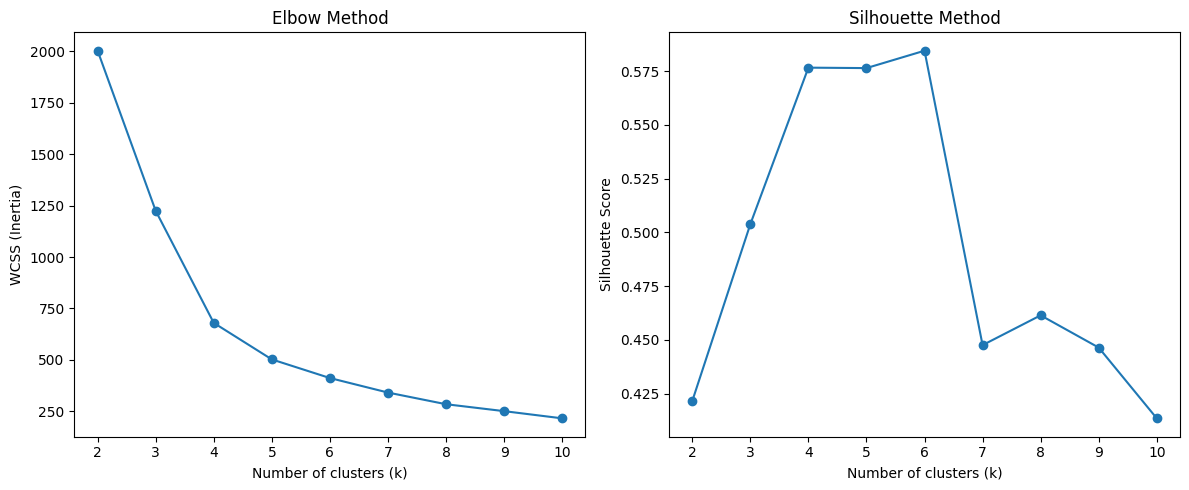

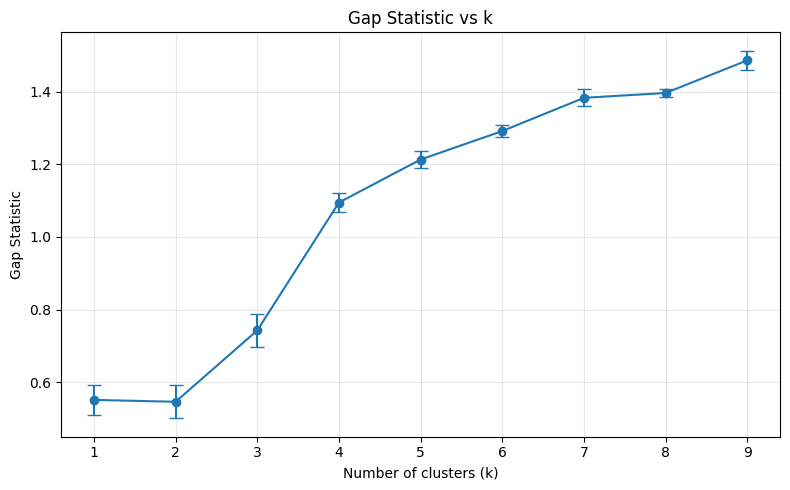

FAMD – Best k by Silhouette: 6
FAMD – Best k by Gap: 9
   clusterCount       gap   gap_std
0             1  0.551307  0.041525
1             2  0.546250  0.045658
2             3  0.742756  0.044609
3             4  1.094954  0.026739
4             5  1.213364  0.022934
5             6  1.291758  0.016338
6             7  1.383221  0.022932
7             8  1.396572  0.012284
8             9  1.486534  0.026423


In [77]:
X_famd_cluster = famd.row_coordinates(df_mix).values

results_famd = kmeans_diagnostics(X_famd_cluster, max_clusters=10, nrefs=5)

print("FAMD – Best k by Silhouette:", results_famd["optimal_k_silh"])
print("FAMD – Best k by Gap:", results_famd["optimal_k_gap"])
print(results_famd["gap_df"])


In [78]:
k_famd_final = results_famd["optimal_k_gap"]
kmeans_famd_final = KMeans(n_clusters=k_famd_final, random_state=42, n_init=10)
df_famd_comp["cluster_famd"] = kmeans_famd_final.fit_predict(X_famd_cluster)


k_famd_final = results_famd["optimal_k_gap"]
kmeans_famd_final = KMeans(n_clusters=k_famd_final, random_state=42, n_init=10)
df_famd_comp["cluster_famd"] = kmeans_famd_final.fit_predict(X_famd_cluster)


In [91]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

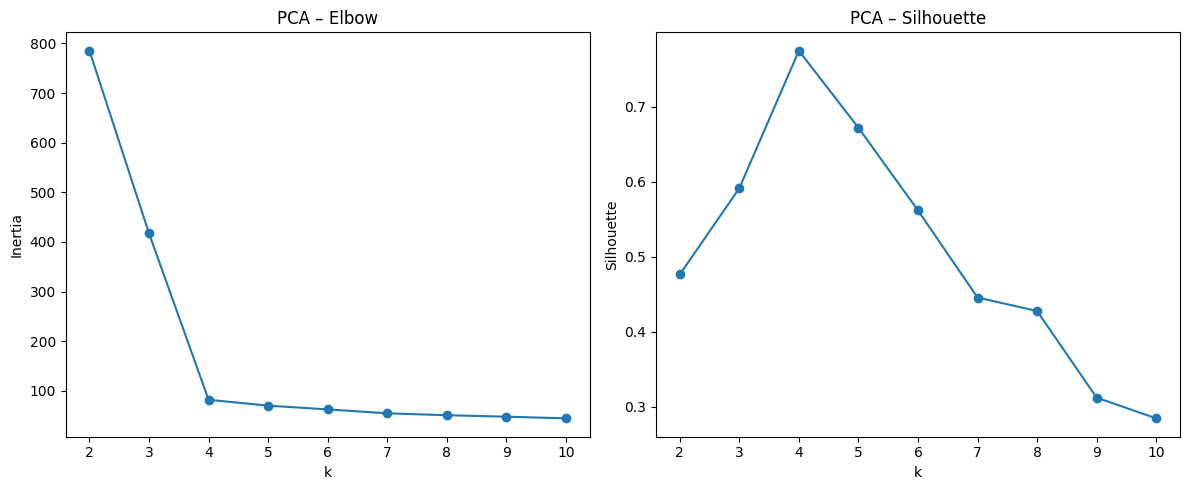

Optimal k (PCA): 4


In [92]:
X_pca_cluster = df_pca_comp[["PC1_pca", "PC2_pca", "PC3_pca"]].values

inertias_pca = []
silhouettes_pca = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca_cluster)
    inertias_pca.append(kmeans.inertia_)
    silhouettes_pca.append(silhouette_score(X_pca_cluster, labels))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertias_pca, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('PCA – Elbow')

plt.subplot(1, 2, 2)
plt.plot(K, silhouettes_pca, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('PCA – Silhouette')

plt.tight_layout()
plt.show()

# Choose k for PCA (e.g., best silhouette)
optimal_k_pca = silhouettes_pca.index(max(silhouettes_pca)) + 2
print("Optimal k (PCA):", optimal_k_pca)

kmeans_pca = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)
df_pca_comp["cluster_pca"] = kmeans_pca.fit_predict(X_pca_cluster)


In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def optimalK_gap(data, maxClusters=10, nrefs=3):
    """
    Calculates optimal K using Gap Statistic (Tibshirani et al.)
    
    Params:
        data: ndarray of shape (n_samples, n_features) - your PCA or FAMD coordinates
        maxClusters: Maximum number of clusters to test
        nrefs: Number of random reference datasets to generate
    
    Returns: 
        optimal_k: Best k by Gap Statistic
        resultsdf: DataFrame with gap values for each k
    """
    gaps = np.zeros(maxClusters - 1)
    s_k = np.zeros(maxClusters - 1)  # Standard deviations
    resultsdf = pd.DataFrame({'clusterCount': [], 'gap': [], 'gap_std': []})
    
    for gap_index, k in enumerate(range(1, maxClusters)):
        # Reference dispersions
        refDisps = np.zeros(nrefs)
        
        # Generate random reference datasets
        for i in range(nrefs):
            # Random uniform data matching original data range
            randomReference = np.random.uniform(
                low=data.min(axis=0),
                high=data.max(axis=0),
                size=data.shape
            )
            
            km = KMeans(n_clusters=k, random_state=42, n_init=10)
            km.fit(randomReference)
            refDisps[i] = np.log(km.inertia_)
        
        # Fit cluster to original data
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        km.fit(data)
        origDisp = np.log(km.inertia_)
        
        # Calculate gap statistic
        gap = np.mean(refDisps) - origDisp
        
        # Standard deviation (for 1-SE rule)
        sd_k = np.sqrt(np.mean((refDisps - np.mean(refDisps))**2))
        s_k[gap_index] = sd_k * np.sqrt(1 + 1/nrefs)
        
        gaps[gap_index] = gap
        
        resultsdf = pd.concat([
            resultsdf,
            pd.DataFrame({'clusterCount': [k], 'gap': [gap], 'gap_std': [s_k[gap_index]]})
        ], ignore_index=True)
    
    # Find optimal k using 1-SE rule (more conservative than argmax)
    # Choose smallest k where Gap(k) >= Gap(k+1) - s_{k+1}
    for k in range(len(gaps) - 1):
        if gaps[k] >= gaps[k + 1] - s_k[k + 1]:
            optimal_k = k + 1  # +1 because range starts at 1
            break
    else:
        optimal_k = gaps.argmax() + 1  # Fallback to max gap
    
    return optimal_k, resultsdf


Optimal k for PCA (Gap Statistic): 4


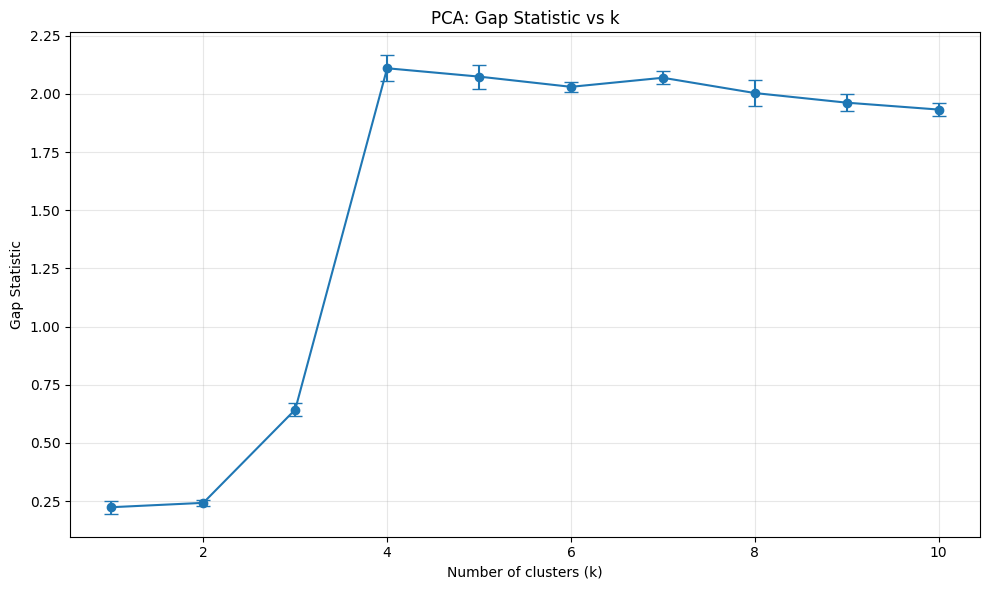

In [96]:
# Your PCA cluster features
X_pca_cluster = df_pca_comp[["PC1_pca", "PC2_pca", "PC3_pca"]].values

# Run Gap Statistic
optimal_k_pca_gap, gap_results_pca = optimalK_gap(X_pca_cluster, maxClusters=11, nrefs=5)
print(f"Optimal k for PCA (Gap Statistic): {optimal_k_pca_gap}")

# Plot Gap Statistic
plt.figure(figsize=(10, 6))
plt.errorbar(gap_results_pca['clusterCount'], gap_results_pca['gap'], 
             yerr=gap_results_pca['gap_std'], marker='o', capsize=5)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('PCA: Gap Statistic vs k')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Final clustering with Gap-optimal k
kmeans_pca_gap = KMeans(n_clusters=optimal_k_pca_gap, random_state=42, n_init=10)
df_pca_comp["cluster_gap"] = kmeans_pca_gap.fit_predict(X_pca_cluster)


Optimal k for FAMD (Gap Statistic): 1


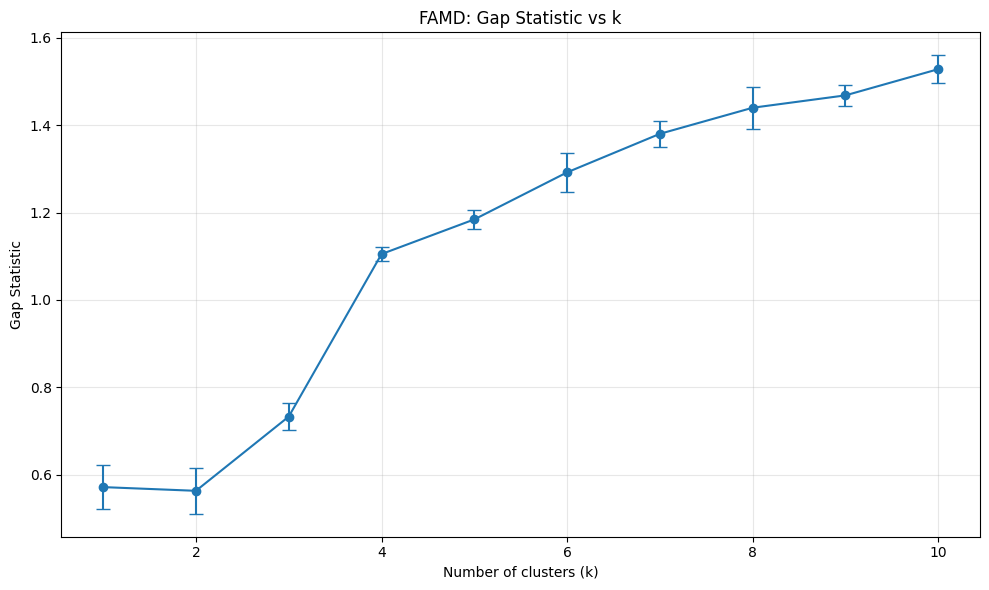

In [97]:
# FAMD features
famd_features = famd.row_coordinates(df_mix).values

# Run Gap Statistic
optimal_k_famd_gap, gap_results_famd = optimalK_gap(famd_features, maxClusters=11, nrefs=5)
print(f"Optimal k for FAMD (Gap Statistic): {optimal_k_famd_gap}")

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(gap_results_famd['clusterCount'], gap_results_famd['gap'],
             yerr=gap_results_famd['gap_std'], marker='o', capsize=5)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('FAMD: Gap Statistic vs k')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Final clustering
kmeans_famd_gap = KMeans(n_clusters=optimal_k_famd_gap, random_state=42, n_init=10)
df_famd_comp["cluster_gap"] = kmeans_famd_gap.fit_predict(famd_features)


In [98]:
print(f"PCA optimal k:")
print(f"  - Silhouette: {optimal_k_pca} (from your earlier code)")
print(f"  - Gap Statistic: {optimal_k_pca_gap}")

print(f"\nFAMD optimal k:")
print(f"  - Silhouette: {optimal_k_famd}")
print(f"  - Gap Statistic: {optimal_k_famd_gap}")


PCA optimal k:
  - Silhouette: 4 (from your earlier code)
  - Gap Statistic: 4

FAMD optimal k:
  - Silhouette: 6
  - Gap Statistic: 1


# ELIMINA

In [ ]:
# Ensure indices are aligned for merging easily
df_filtered = df_filtered.copy()
df_filtered['Cluster'] = result_df['Cluster']

# Check: Now each row in df_filtered has its assigned cluster
df_filtered


In [ ]:
# Key variables choice 
numeric_vars = ["income", "swls_1", "swls_2", "swls_3", "swls_4", "swls_5", # Well-being (SWLS items)
                "sum_pcl5", # PTSD measures
                "pgsi_1", "pgsi_2", "pgsi_3", "pgsi_4", "pgsi_5", "pgsi_6", "pgsi_7", "pgsi_8", "pgsi_9", # Behavioral risk
                ]

categorical_vars = [
    "income_group",       
    "ptsd_status",       
    "school_labels", "education",
]

# Mean and count for numeric variables
summary_numeric = df_filtered.groupby("Cluster")[numeric_vars].agg(['mean', 'count'])
print("Numeric summary:\n", summary_numeric)

# Mode and count for categorical variables
for cat in categorical_vars:
    print(f"\nVariable: {cat}")
    display(df_filtered.groupby("Cluster")[cat].agg(lambda x: x.value_counts().index[0]))
    display(df_filtered.groupby("Cluster")[cat].value_counts())

In [ ]:
# mean and median 
means = df_filtered.groupby('Cluster')[numeric_vars].mean()
medians = df_filtered.groupby('Cluster')[numeric_vars].median()

n_vars = len(numeric_vars)
n_cols = 3  # subplots per column
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))
axes = axes.flatten()

for i, var in enumerate(numeric_vars):
    sns.boxplot(x="Cluster", y=var, data=df_filtered, ax=axes[i], palette="colorblind")
    axes[i].set_title(f'{var} by Cluster')
    # Statistics below the boxplot for each cluster
    mean0 = means.loc[0, var] if 0 in means.index else float('nan')
    mean1 = means.loc[1, var] if 1 in means.index else float('nan')
    med0 = medians.loc[0, var] if 0 in medians.index else float('nan')
    med1 = medians.loc[1, var] if 1 in medians.index else float('nan')
    axes[i].text(0, axes[i].get_ylim()[0], f'Mean: {mean0:.2f}\nMedian: {med0:.2f}', 
                 ha='center', va='bottom', fontsize=9, color='navy', backgroundcolor='white')
    axes[i].text(1, axes[i].get_ylim()[0], f'Mean: {mean1:.2f}\nMedian: {med1:.2f}', 
                 ha='center', va='bottom', fontsize=9, color='navy', backgroundcolor='white')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(var)

# Delete empty subplot
for i in range(n_vars, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


**Cluster 0**
- Lower income and well-being: Mean income and SWLS (life satisfaction) scores are much lower; medians suggest that most individuals in this cluster report relatively poor socioeconomic status and life satisfaction.
- Higher clinical and behavioral risk: Mean and median values for sum_pcl5 (PTSD symptoms) and all PGSI items (gambling risk) are distinctly higher. Most individuals in Cluster 0 score above zero for gambling-related problems and PTSD symptoms.

Profile: **This cluster represents a high-risk group—individuals with lower life satisfaction and income, and heightened behavioral (gambling) and clinical (PTSD) issues.**

**Cluster 1**
- Higher income and well-being: Both mean and median income are significantly higher; all SWLS items cluster at the top end of the scale. This means most people here report high satisfaction and favorable socioeconomic conditions
- Minimal clinical/behavioral risk: Median values for sum_pcl5 and PGSI items are at zero, and means are close to zero, indicating that almost all members of Cluster 1 show low clinical symptoms and minimal gambling risk.

Profile: This cluster is a low-risk, “resilient” group—marked by **high well-being, robust social/economic background, and very few behavioral or clinical problems**.

**Relation to FAMD Dimensions**

- The horizontal separation (Dimension 1) in your FAMD plot is driven by well-being, social support, clinical risk, and socioeconomic status. This axis discriminates between Cluster 0 (low well-being, low income, high risk) and Cluster 1 (high well-being, high income, low risk).
- The vertical axis (Dimension 2) reflects variation primarily in social/educational context and behavioral risk: It helps separate the more severe and problematic cases by highlighting differences in gambling and clinical symptoms, as well as education and school factors.

Your clusters separate participants into:
- Cluster 0: Lower income/well-being and higher clinical/behavioral risk (problematic and severely problematic addiction).
- Cluster 1: Higher income/well-being and minimal risk (mostly normal addiction level).

In [ ]:
df_filtered

In [ ]:
# Ensure order
order = ["Normal", "Problematic", "Severely problematic"]
ct = ct[order]

ax = ct.plot(kind='bar', stacked=True, color=['#e41a1c', '#377eb8', '#4daf4a'])
plt.xlabel("Cluster")
plt.ylabel("Number of Participants")
plt.title("Addiction Levels in Each Cluster")
plt.legend(title='Addiction Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add counts above each segment in the bars
for i, cluster in enumerate(ct.index):
    y_offset = 0
    for level in order:
        count = ct.loc[cluster, level]
        if count > 0:
            ax.text(i, y_offset + count/2, str(count), ha='center', va='center', color='white', fontweight='bold')
            y_offset += count

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# 1. Identify categorical columns
categorical_cols = df_filtered.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. Exclude 'sum_iat' and 'Cluster' from features
X = df_filtered.drop(columns=['Cluster', 'sum_iat'])  # <--- Remove sum_iat here!
y = df_filtered['Cluster']

# 3. If sum_iat was categorical, update list
categorical_cols = [col for col in categorical_cols if col != 'sum_iat']

# 4. Build the transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numeric columns as-is
)

# 5. Encode features and fit Random Forest
X_encoded = preprocessor.fit_transform(X)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_encoded, y)

importances = rf.feature_importances_
print("Feature importances calculated.")


In [ ]:
feature_names = preprocessor.get_feature_names_out()  

# Make a DataFrame for plotting
importances_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# Plot a horizontal bar chart
plt.figure(figsize=(10,7))
g = sns.barplot(
    x="importance",
    y="feature",
    data=importances_df,
    palette="Blues_r"
)
g.set_title("Random Forest Feature Importances", fontsize=14)
g.set_xlabel("Importance (Gini importance)")
g.set_ylabel("Feature")
for value in g.containers:
    g.bar_label(value, padding=2)
plt.tight_layout()
plt.show()

According to Random Forest analysis, the features that most powerfully differentiate Cluster 1 (low-risk/“Normal” group) from Cluster 0 (high-risk/“Problematic” and “Severely problematic” group) are income, Internet addiction score (sum_iat), and multiple measures of well-being (SWLS items). 
**Individuals in Cluster 1 consistently show higher income and well-being, while those in Cluster 0 score lower on these measures and higher on clinical and behavioral risk indicators.** These results confirm that socioeconomic status, life satisfaction, and addiction-related behaviors are the principal factors separating the two clusters.

In [ ]:
# 1. Build the importance DataFrame
feature_importance_table = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
})

# Sort by importance, highest first
feature_importance_table = feature_importance_table.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_table.head(10)


In [ ]:
swls_items = ['swls_1', 'swls_2', 'swls_3', 'swls_4', 'swls_5']
df_filtered['swls_total'] = df_filtered[swls_items].sum(axis=1)
df_filtered['who5_total'] = df_filtered[who5_cols].sum(axis=1)


# threshold definition
def color_income(x):
    if x >= df_filtered['income'].quantile(0.66):
        return "🟢 High"
    elif x >= df_filtered['income'].quantile(0.33):
        return "🟡 Moderate"
    else:
        return "🔴 Low"

def color_iat(x):
    # threshold IAT
    if x < 31:
        return "🟢 Low"
    elif x < 50:
        return "🟡 Moderate"
    else:
        return "🔴 High"

def color_swls(x):
    # SWLS: <15 low, 15–25 medium, >25 high
    if x > 25:
        return "🟢 High"
    elif x >= 15:
        return "🟡 Moderate"
    else:
        return "🔴 Low"

def color_education(x):
    # Education
    if x >= df_filtered['education'].quantile(0.66):
        return "🟢 High"
    elif x >= df_filtered['education'].quantile(0.33):
        return "🟡 Mixed"
    else:
        return "🔴 Low"

def color_who5(x):
    # total WHO-5 (0 to 25)
    if x > 15:
        return "🟢 High"
    elif x >= 10:
        return "🟡 Moderate"
    else:
        return "🔴 Low"


# color computation for each participant
df_filtered["Income_level"] = df_filtered["income"].apply(color_income)
df_filtered["IAT_level"] = df_filtered["sum_iat"].apply(color_iat)
df_filtered["SWLS_level"] = df_filtered["swls_total"].apply(color_swls)
df_filtered["Education_level"] = df_filtered["education"].apply(color_education)
df_filtered["WHO5_level"] = df_filtered["who5_total"].apply(color_who5)

# table
persona_table = df_filtered[[
    "Cluster",
    "Income_level",
    "IAT_level",
    "SWLS_level",
    "Education_level",
    "WHO5_level"
]]

print(persona_table.head())

## vedere se mantenere tutte le somme

The scatterplot is a fundamental tool for visualizing the relationship between two continuous numerical variables. By plotting individual data points on a two-dimensional plane, it allows for an immediate and intuitive perception of any patterns, trends, or anomalous observations present in the data.

In this context, the scatterplot is complemented by the calculation of Spearman’s rank correlation coefficient, which quantifies the monotonic association between the Internet Addiction Test (IAT) scores and other psychometric measures without assuming linearity or normality of the data.

This combined use of graphical representation and robust nonparametric correlation provides a comprehensive understanding of how internet addiction relates to various psychological constructs, supporting more reliable and insightful interpretations.


In [ ]:
# define new columns that contain the sum of numerical pshycometric test results 
df_filtered['sum_pgsi'] = df_filtered[pgsi_cols].sum(axis=1)
df_filtered['sum_pcl5'] = df_filtered[pcl5_cols].sum(axis=1)
df_filtered['sum_mspss'] = df_filtered[mspss_cols].sum(axis=1)
df_filtered['sum_swls'] = df_filtered[swls_cols].sum(axis=1)
df_filtered['sum_who5'] = df_filtered[who5_cols].sum(axis=1)

In [ ]:
# List of psychometric measures and their descriptive names
psychometric_measures = ['sum_pgsi', 'sum_pcl5', 'sum_mspss', 'sum_swls', 'sum_who5']
psychometric_measures_names = ['Gambling Addiction (PGSI)', 'PTSD (PCL-5)', 'Perceived Social Support (MSPSS)', 'Life Satisfaction (SWLS)', 'Well-being Index (WHO-5)']

# Dictionary to store correlation results
correlation_results = {}

# Create scatter plot figure
plt.figure(figsize=(18, 12))

# Loop over each psychometric measure to plot and calculate Spearman correlation with IAT
for i, measure in enumerate(psychometric_measures):
    plt.subplot(2, 3, i+1)  # Adjust layout to 2 rows 3 cols to fit 5 plots
    sns.scatterplot(x=df_filtered['sum_iat'], y=df_filtered[measure])
    plt.title(f'IAT vs {psychometric_measures_names[i]}')
    plt.xlabel('IAT Score')
    plt.ylabel(f'{psychometric_measures_names[i]} Score')
    
    # Calculate Spearman correlation (non-parametric, suitable for non-normal data)
    spearman_corr, spearman_p_value = spearmanr(df_filtered['sum_iat'], df_filtered[measure])
    correlation_results[psychometric_measures_names[i]] = {
        'Method': 'Spearman',
        'Coefficient': spearman_corr,
        'p-value': Decimal(spearman_p_value)
    }

plt.tight_layout()
plt.show()

# Print correlation results with formatted output
for measure_name, result in correlation_results.items():
    print(f"{measure_name}: {result['Method']} Coefficient = {result['Coefficient']:.3f}, p-value = {result['p-value']:.2e}")


The scatterplots visually confirm the correlations detected in the statistical analysis:

Gambling Addiction (PGSI): The plot shows no clear pattern or trend between IAT and PGSI scores, which aligns with the negligible Spearman coefficient (0.005) and non-significant p-value.

PTSD (PCL-5): A slight upward trend can be observed, supporting the weak but significant positive Spearman correlation (0.177, p = 0.012), meaning higher internet addiction is modestly associated with increased PTSD symptoms.

Perceived Social Support (MSPSS): The scatterplot does not suggest a strong association, consistent with the weak negative and non-significant Spearman coefficient (-0.066).

Life Satisfaction (SWLS): There is a visible negative trend with higher IAT scores corresponding to lower life satisfaction, matching the moderate and significant negative Spearman correlation (-0.283, p < 0.001).

Well-being Index (WHO-5): Similarly, the plot indicates a clear negative association, reinforcing the moderate, significant negative Spearman correlation (-0.274, p < 0.001).

In summary, the graphical results substantiate the statistical findings: internet addiction shows moderate associations with reduced life satisfaction and well-being, a weak positive link to PTSD, but is not meaningfully linked to gambling problems or perceived social support in this dataset.